# 2021 BRFSS Data
<a href="https://fawzyalmatary.com/" style="font-size:16px; color:blue; text-decoration:none;">Fawzy Almatary</a>

### About the Data:
- The dataset used in this project is the 2021 BRFSS Data. The Behavioral Risk Factor Surveillance System (BRFSS) is a collaborative project between all the states in the United States and participating US territories and the Centers for Disease Control and Prevention (CDC).
- It is used to collect prevalence data among adult U.S. residents regarding their risk behaviors and preventive health practices that can affect their health status. Respondent data are forwarded to CDC to be aggregated for each state, returned with standard tabulations, and published at year's end by each state. 
- If you are interested about the database, you can visit the CDC website by __[Clicking Here](https://www.cdc.gov/brfss/annual_data/annual_2021.html)__



### This project consists of four main parts:
- **<a href="#preprocessing">Part 1. Preprocessing:</a></li>**
    - In this part, we will perform data preprocessing tasks.
    - We will select the relevant columns for analysis, transform the values in those columns into a more human-readable form based on the BRFSS codebook, and make other necessary changes to the data.


- **<a href="#eda">Part 2. Exploratory Data Analysis:</a></li>**
    - In this part, we will conduct exploratory data analysis to uncover insights and patterns in the BRFSS data.
    - By exploring the data visually and statistically, we aim to gain a better understanding of the dataset and identify interesting trends or relationships.


- **<a href="#stats">Part 3. Statistical Analysis:</a></li>**
    - In this part, we will perform statistical hypotheses testing to evaluate some of the insights and patterns discovered in the EDA phase.
    - By applying appropriate statistical tests, we can draw conclusions and make inferences about the relationships between different variables in the dataset.


- **<a href="#model">Part 4. Model Development:</a></li>**
    - In this part, I will two types of models: (1) Statistical logistic regression model using statsmodel. (2) Predictive machine learning logistic regression model using scikit-learn to predict diabetes diagnosis.
    - In this final part, we will build two types of models:
        - First, a statistical logistic regression model using the statsmodel library will be created.
        - Second, a predictive machine learning logistic regression model using scikit-learn will be developed to predict diabetes diagnosis.
    - These models will help us understand the factors that contribute to diabetes and make predictions based on the available data.

<a id='preprocessing'></a>
# Part 1. Preprocessing:

In [1]:
# Import the packages that will be needed in this analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

# Define some setting
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams["figure.figsize"] = (10,8)
plt.rcParams['axes.titlesize'] = 18

In [2]:
df_raw = pd.read_sas('LLCP2021.XPT')
df_raw.sample(5)

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,PVTRESD1,COLGHOUS,STATERE1,CELPHON1,LADULT1,COLGSEX,NUMADULT,LANDSEX,NUMMEN,NUMWOMEN,RESPSLCT,SAFETIME,CTELNUM1,CELLFON5,CADULT1,CELLSEX,PVTRESD3,CCLGHOUS,CSTATE1,LANDLINE,HHADULT,SEXVAR,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,PRIMINSR,PERSDOC3,MEDCOST1,CHECKUP1,EXERANY2,BPHIGH6,BPMEDS,CHOLCHK3,TOLDHI3,CHOLMED3,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD3,ADDEPEV3,CHCKDNY2,DIABETE4,DIABAGE3,HAVARTH5,ARTHEXER,ARTHEDU,LMTJOIN3,ARTHDIS2,JOINPAI2,MARITAL,EDUCA,RENTHOM1,NUMHHOL3,NUMPHON3,CPDEMO1B,VETERAN3,EMPLOY1,CHILDREN,INCOME3,PREGNANT,WEIGHT2,HEIGHT3,DEAF,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,USENOW3,ECIGNOW1,ALCDAY5,AVEDRNK3,DRNK3GE5,MAXDRNKS,FLUSHOT7,FLSHTMY3,IMFVPLA2,PNEUVAC4,HIVTST7,HIVTSTD3,FRUIT2,FRUITJU2,FVGREEN1,FRENCHF1,POTATOE1,VEGETAB2,PDIABTST,PREDIAB1,INSULIN1,BLDSUGAR,FEETCHK3,DOCTDIAB,CHKHEMO3,FEETCHK,EYEEXAM1,DIABEYE,DIABEDU,TOLDCFS,HAVECFS,WORKCFS,TOLDHEPC,TRETHEPC,PRIRHEPC,HAVEHEPC,HAVEHEPB,MEDSHEPB,HPVADVC4,HPVADSHT,TETANUS1,SHINGLE2,LCSFIRST,LCSLAST,LCSNUMCG,LCSCTSCN,HADMAM,HOWLONG,CERVSCRN,CRVCLCNC,CRVCLPAP,CRVCLHPV,HADHYST2,PSATEST1,PSATIME1,PCPSARS2,PCSTALK,HADSIGM4,COLNSIGM,COLNTES1,SIGMTES1,LASTSIG4,COLNCNCR,VIRCOLO1,VCLNTES1,SMALSTOL,STOLTEST,STOOLDN1,BLDSTFIT,SDNATES1,CNCRDIFF,CNCRAGE,CNCRTYP1,CSRVTRT3,CSRVDOC1,CSRVSUM,CSRVRTRN,CSRVINST,CSRVINSR,CSRVDEIN,CSRVCLIN,CSRVPAIN,CSRVCTL2,HOMBPCHK,HOMRGCHK,WHEREBP,SHAREBP,WTCHSALT,DRADVISE,CIMEMLOS,CDHOUSE,CDASSIST,CDHELP,CDSOCIAL,CDDISCUS,CAREGIV1,CRGVREL4,CRGVLNG1,CRGVHRS1,CRGVPRB3,CRGVALZD,CRGVPER1,CRGVHOU1,CRGVEXPT,ACEDEPRS,ACEDRINK,ACEDRUGS,ACEPRISN,ACEDIVRC,ACEPUNCH,ACEHURT1,ACESWEAR,ACETOUCH,ACETTHEM,ACEHVSEX,ACEADSAF,ACEADNED,MARIJAN1,USEMRJN3,RSNMRJN2,LASTSMK2,STOPSMK2,FIREARM5,GUNLOAD,LOADULK2,RCSGENDR,RCSRLTN2,CASTHDX2,CASTHNO2,BIRTHSEX,SOMALE,SOFEMALE,TRNSGNDR,QSTVER,QSTLANG,_METSTAT,_URBSTAT,MSCODE,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,_IMPRACE,_CHISPNC,_CRACE1,_CPRACE1,CAGEG,_CLLCPWT,_DUALUSE,_DUALCOR,_LLCPWT2,_LLCPWT,_RFHLTH,_PHYS14D,_MENT14D,_HLTHPLN,_HCVU652,_TOTINDA,_RFHYPE6,_CHOLCH3,_RFCHOL3,_MICHD,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR3,_LMTACT3,_LMTWRK3,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACEPRV,_SEX,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG1,_SMOKER3,_RFSMOK3,_CURECI1,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWK1,_RFDRHV7,_FLSHOT7,_PNEUMO3,_AIDTST4,FTJUDA2_,FRUTDA2_,GRENDA1_,FRNCHDA_,POTADA1_,VEGEDA2_,_MISFRT1,_MISVEG1,_FRTRES1,_VEGRES1,_FRUTSU1,_VEGESU1,_FRTLT1A,_VEGLT1A,_FRT16A,_VEG23A,_FRUITE1,_VEGETE1
80470,16.0,11.0,b'11222021',b'11',b'22',b'2021',1100.0,b'2021006003',2.021006e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,2.0,1.0,NaN,1.0,2.0,1.0,2.0,4.0,30.0,88.0,12.0,3.0,2.0,2.0,1.0,2.0,3.0,NaN,2.0,1.0,1.0,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,1.0,2.0,3.0,NaN,1.0,1.0,1.0,1.0,2.0,7.0,2.0,5.0,1.0,NaN,NaN,1.0,2.0,7.0,88.0,4.0,NaN,155.0,505.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,3.0,3.0,888.0,NaN,NaN,NaN,1.0,102021.0,1.0,2.0,2.0,NaN,120.0,555.0,102.0,305.0,103.0,330.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,4.0,20.0,1.0,2.0,1.0,NaN,162051.0,12.486423,1.0,12.486423,1.0,NaN,NaN,NaN,NaN,NaN,9.0,NaN,186.044029,171.848105,2.0,3.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,3.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,9.0,1.0,62.0,5.0,65.0,165.0,7031.0,2579.0,3.0,2.0,1.0,3.0,2.0,1.0,2.0,1.0,2.0,5.397605e-79,1.0,5.397605e-79,1.0,NaN,NaN,2.0,5.397605e-79,2000.0,200.0,1.700000e+01,300.0,100.0,5.397605e-79,5.397605e-79,1.0,1.0,2000.0,617.0,1.0,1.0,5.397605e-79,1.0,2.00000

In [3]:
# Select the desired columns and rename them for better clarity
Columns_To_Keep = ['_URBSTAT', 'SEXVAR', '_AGE_G', '_EDUCAG', 'MARITAL', '_INCOMG1', 'VETERAN3', 'HTM4', 'WTKG3', '_BMI5', '_BMI5CAT', '_SMOKER3', 'AVEDRNK3', '_HLTHPLN', '_RFHYPE6', 'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3', 'DIABETE4', 'DIABAGE3', 'BLDSUGAR', 'CHKHEMO3', 'INSULIN1', 'DIABEYE', 'FEETCHK', '_LTASTH1', 'CHCCOPD3', '_DRDXAR3', 'CHCKDNY2', 'ADDEPEV3']
Columns_New_Name = ['Urban_Rural', 'Gender', 'Age_Category', 'Education', 'Martial_Status', 'Income_Category', 'Veteran', 'Height', 'Weight', 'BMI', 'BMI_Category', 'Smoking' ,'Alcohol_Drinks', 'Insurance', 'HTN', 'MI', 'CHD', 'Stroke', 'DM', 'DM_Age', 'BGM_Weekly', 'A1C', 'Insulin', 'Retinopathy_Counseled', 'Feet_Check', 'Asthma', 'COPD', 'Arthritis', 'Kidney_Disease', 'Depression']
df = df_raw[Columns_To_Keep].set_axis(Columns_New_Name, axis=1).copy()

# Create a dictionary to map existing values to new values
values = {
    'Urban_Rural': {1:'Urban counties', 2:'Rural counties'},
    'Gender': {1:'Male', 2:'Female'},
    'Age_Category': {1:'18 to 24', 2:'25 to 34', 3:'35 to 44', 4:'45 to 54', 5:'55 to 64', 6:'65 or older'},
    'Education': {1:'Did not graduate High School', 2:'Graduated High School', 3:'Attended College or Technical School', 4:'Graduated from College or Technical School', 9:np.nan},
    'Martial_Status': {1:'Married', 2:'Divorced', 3:'Widowed', 4:'Separated', 5:'Never married', 6:'A member of an unmarried couple', 9:np.nan},
    'Income_Category': {1:'0 to $15,000', 2:'$15,000 to < $25,000', 3:'$25,000 to < $35,000', 4:'$35,000 to < $50,000', 5:'$50,000 to < $100,000', 6:'$100,000 to < $200,000', 7:'$200,000 or more', 9:np.nan},
    'Veteran': {1:'Yes', 2:'No', 7:np.nan, 9:np.nan},
    'BMI_Category': {1:'Underweight', 2:'Normal Weight', 3:'Overweight', 4:'Obese'},
    'Smoking': {1:'Current smoker', 2:'Current smoker', 3:'Former smoker', 4:'Never smoked', 9:np.nan},
    'Alcohol_Drinks': {88:0, 77:np.nan, 99:np.nan},
    'Insurance': {1:'Yes', 2:'No', 9:np.nan},
    'HTN': {1:'No', 2:'Yes', 9:np.nan},
    'MI': {1:'Yes', 2:'No', 7:np.nan, 9:np.nan},
    'CHD': {1:'Yes', 2:'No', 7:np.nan, 9:np.nan},
    'Stroke': {1:'Yes', 2:'No', 7:np.nan, 9:np.nan},
    'DM': {1:'Yes', 2:'No', 3:'No', 4:'No', 7:np.nan, 9:np.nan},
    'Insulin': {1:'Yes', 2:'No', 7:np.nan, 9:np.nan},
    'Retinopathy_Counseled': {1:'Yes', 2:'No', 7:np.nan, 9:np.nan},
    'Asthma': {1:'No', 2:'Yes', 9:np.nan},
    'COPD': {1:'Yes', 2:'No', 7:np.nan, 9:np.nan},
    'Arthritis': {1:'Yes', 2:'No'},
    'Kidney_Disease': {1:'Yes', 2:'No', 7:np.nan, 9:np.nan},
    'Depression': {1:'Yes', 2:'No', 7:np.nan, 9:np.nan}
    }

# Apply the dictionary mapping to rename the values in the columns
for key, value in values.items():
    df[key].replace(value, inplace=True)

#df.sample(5)

In [4]:
# Modify the data type of the Height, DM_Age, A1C, Feet_Check, and BGM_Weekly columns
df['Height'] = df['Height'].astype('float64')
df['DM_Age'] = df['DM_Age'].replace({98:np.nan, 99:np.nan}).astype('float64')
df['A1C'] = df['A1C'].replace({88:0, 98:np.nan, 99:np.nan, 77:np.nan}).astype('float64')
df['Feet_Check'] = df['Feet_Check'].replace({88:0, 99:np.nan, 77:np.nan}).astype('float64')
df['BGM_Weekly'] = df['BGM_Weekly'].replace({777:np.nan, 888:np.nan, 999:np.nan,}).astype('float64')

# Divide the values in the Weight and BMI columns by 100
df[['Weight', 'BMI']] = df[['Weight', 'BMI']] / 100

# Adjust all the values in the blood glucose measurement column to reflect the number of weekly measurements
df = df[~((df['BGM_Weekly'] > 111) & (df['BGM_Weekly'] < 200)) | ((df['BGM_Weekly'] > 251) & (df['BGM_Weekly'] < 300))]
df['BGM_Weekly'] = np.where(df['BGM_Weekly'].between(101, 200), (df['BGM_Weekly'] - 100) * 7, df['BGM_Weekly'])
df['BGM_Weekly'] = np.where(df['BGM_Weekly'].between(201, 300), df['BGM_Weekly'] - 200, df['BGM_Weekly'])
df['BGM_Weekly'] = np.where(df['BGM_Weekly'].between(301, 400), (df['BGM_Weekly'] - 300) / 4, df['BGM_Weekly'])
df['BGM_Weekly'] = np.where(df['BGM_Weekly'].between(401, 500), (df['BGM_Weekly'] - 400) / 52, df['BGM_Weekly'])

In [5]:
def outliers(dataframe, column):
    """
    Purpose:
    The function outliers takes a pandas dataframe and a column as input, and returns the dataframe with the outliers in the specified column replaced by the upper and lower limits calculated using the interquartile range (IQR).

    Inputs:
    dataframe: a pandas dataframe
    column: the name of a column in the dataframe. The column should contain numerical values.

    Outputs:
    The function returns the dataframe with outliers in the specified column replaced by the upper and lower limits, mentioning numbers of outliers that were replaced in the column.
    If the column does not have any outliers, the function returns the original dataframe with a message indicating that no changes were made.

    Methodology:
    The first quartile (q1) and the third quartile (q3) are calculated for the specified column.
    The interquartile range (iqr) is calculated as the difference between q3 and q1.
    The upper limit is calculated as q3 + (1.5 * iqr), and the lower limit is calculated as q1 - (1.5 * iqr).
    If the dataframe contains any values outside the upper or lower limits, the outliers in the specified column are replaced by the upper and lower limits.
    The dataframe is returned, with a message indicating that the outliers were replaced if applicable.  
    """
    
    q1 = dataframe[column].quantile(0.25)
    q3 = dataframe[column].quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - (1.5 * iqr)
    upper_limit = q3 + (1.5 * iqr)
    outliers_replaced = len(dataframe[(dataframe[column] < lower_limit) | (dataframe[column] > upper_limit)])
    if dataframe[(dataframe[column] > upper_limit) | (dataframe[column] < lower_limit)].any(axis=None):
        dataframe.loc[(dataframe[column] < lower_limit), column] = lower_limit
        dataframe.loc[(dataframe[column] > upper_limit), column] = upper_limit
        print(f"- {column} column had {outliers_replaced} outliers; these outliers were replaced with upper/lower limits.")
    else:
        print(f"- {column} column does not have any outliers; no changes were made.")

# Specify the columns to which you want to apply the function
num_cols = [col for col in df.columns if df[col].dtypes != 'O']

# Execute the function for all the numerical columns in the dataset
for col in num_cols:
    outliers(df, col)

# Review the statistical analyses of the dataframe after the removal of outliers
df.describe().T.round(2)

- Height column had 1567 outliers; these outliers were replaced with upper/lower limits.
- Weight column had 9348 outliers; these outliers were replaced with upper/lower limits.
- BMI column had 12266 outliers; these outliers were replaced with upper/lower limits.
- Alcohol_Drinks column had 6239 outliers; these outliers were replaced with upper/lower limits.
- DM_Age column had 541 outliers; these outliers were replaced with upper/lower limits.
- BGM_Weekly column had 768 outliers; these outliers were replaced with upper/lower limits.
- A1C column had 447 outliers; these outliers were replaced with upper/lower limits.
- Feet_Check column had 801 outliers; these outliers were replaced with upper/lower limits.


,count,mean,std,min,25%,50%,75%,max
Height,413797.0,170.27,10.59,140.50,163.00,170.00,178.00,200.50
Weight,397787.0,82.80,20.16,27.23,68.04,80.74,95.25,136.06
BMI,391524.0,28.36,5.91,12.73,24.14,27.44,31.74,43.14
Alcohol_Drinks,206697.0,2.06,1.38,0.00,1.00,2.00,3.00,6.00
DM_Age,52609.0,49.70,14.55,10.00,40.00,50.00,60.00,90.00
BGM_Weekly,18487.0,9.78,8.93,0.02,2.00,7.00,14.00,32.00
A1C,20557.0,2.52,1.63,0.00,1.00,2.00,4.00,8.50
Feet_Check,21031.0,1.85,1.70,0.00,1.00,1.00,3.00,6.00


In [6]:
# Create ordered categorical columns
orders = {
        'Age_Category': ["18 to 24", "25 to 34", "35 to 44", "45 to 54", "55 to 64" , "65 or older"],
        'Education': ["Did not graduate High School", "Graduated High School", "Attended College or Technical School", "Graduated from College or Technical School"],
        'Income_Category': ["0 to $15,000", "$15,000 to < $25,000", "$25,000 to < $35,000", "$35,000 to < $50,000", "$50,000 to < $100,000", "$100,000 to < $200,000", "$200,000 or more"],
        'BMI_Category': ["Underweight", "Normal Weight", "Overweight", "Obese"]
        }

for column, order in orders.items():
    df[column] = pd.Categorical(df[column], order, ordered=True)

# Define columns' lists
diseases = ['HTN', 'DM', 'Asthma', 'COPD', 'Arthritis', 'Kidney_Disease', 'Depression', 'MI', 'CHD', 'Stroke']
cat_vars = [col for col in df.columns if (df[col].dtypes == 'object' or df[col].dtypes == 'category') and col not in diseases]
num_vars = [col for col in df.columns if col not in cat_vars + diseases]
cat_cols = diseases + cat_vars

In [7]:
# Eliminate any duplicated rows from the dataset
print(f'Number of duplicated rows found to be eliminated is "{df.duplicated().sum()}".')
df.drop_duplicates(inplace=True)

Number of duplicated rows found to be eliminated is "19304".


In [8]:
# Check the data to get a better understanding of its structure and content

def inspect_df(dataframe):
    print(" Shape ".center(50, '#'), end='\n\n')
    print(f"This dataframe consists of {dataframe.shape[0]} rows and {dataframe.shape[1]} columns.")
    print(f"Number of duplicated rows is {dataframe.duplicated().sum()} rows.", end='\n\n\n')
    
    print(" Categorical Columns' Data ".center(50, '#'), end='\n\n')
    for col in cat_cols:
        print(f'"{col}" column:')
        print(f'='*(len(col)+10))
        print(f'"{col}" column has {dataframe[col].isnull().sum()} null values.')
        print(dataframe[col].value_counts(), end='\n\n\n')

#inspect_df(df)

In [9]:
#df.describe(include="object").T

<a id='eda'></a>
# Part 2. Exploratory Data Analysis:

In [10]:
# Plot each disease against all the other columns in the dataset to explore their relationships

def diseases_eda():
    for disease in diseases:
        for col in num_vars:
            print('\n\n')
            sns.kdeplot(data=df, x=col, hue=disease, common_norm=False, palette={'Yes':'royalblue', 'No':'darkorange'})\
                .set(title=f"{disease} vs. {col}\n(normalized)", xlabel=col, ylabel=None, yticklabels='')
            plt.tick_params(left=False)
            plt.show();
    
        for col in cat_vars:
            print('\n\n')
            fig, ax = plt.subplots()
            pd.crosstab(df[col], df[disease],  normalize='index').apply(lambda r: r*100)\
                .plot(kind="bar", stacked=True, color=['indianred','green'], ax=ax).set(title=f"{disease} vs. {col}")
            for c in ax.containers:
                ax.bar_label(c, fmt='%.1f%%', label_type='center')
            plt.xticks(rotation=30)
            plt.show();

#diseases_eda()

- Due to the generation of 200 plots by the diseases_eda() function, I have decided not to execute it before uploading the project.
- Although these plots offer valuable insights and visualizations, their large quantity makes it difficult to display them all at once.
- If you wish to explore the plots interactively, you can uncomment the function and run it on your local machine.
- Running the diseases_eda() function locally will allow you to observe the extensive range of visualizations it generates.

In [11]:
# # Create a correlation heatmap to identify any potential correlations between variables in the dataset
# sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, linewidth=0.5, cmap='vlag',
#             mask=np.tri(df.corr().shape[0], k=-1).T).set_title("Correlation Heatmap")
# plt.show()

In [12]:
# # Plot the age of diagnosis of DM (Diabetes Mellitus) against the categorical columns
# for col in cat_vars:
#     sns.kdeplot(data=df, x='DM_Age', hue=col, common_norm=False, cumulative=True)\
#         .set(title=f"Age of DM Diagnosis vs. {col}\n(normalized)", xlabel='DM_Age')
#     plt.show();

In [13]:
# # Plot the age of diagnosis of DM (Diabetes Mellitus) against selected numerical columns
# DM_Age_Regplot = ['BMI', 'BGM_Weekly', 'Alcohol_Drinks']

# for i, col in enumerate(DM_Age_Regplot):
#     sns.regplot(data=df, x='DM_Age', y=col, scatter_kws={'s':0.001}, line_kws={'lw':1, 'color':'red'})
#     plt.legend(loc='upper right', labels=[f"Correlation between Age of Diabetes' diagnosis and {col} is {round(df['DM_Age'].corr(df[col]), 2)}"])
#     plt.title(f"{col}")
#     plt.show()
#     if i < len(DM_Age_Regplot) - 1: print('\n' + '='*100 + '\n')

In [14]:
# # Plot the age of diagnosis of DM (Diabetes Mellitus) against selected numerical columns
# DM_Age_Regplot = ['BMI', 'BGM_Weekly', 'Alcohol_Drinks']

# def plot_regplot(dataframe, col):
#     sns.regplot(data=dataframe, x='DM_Age', y=col, scatter_kws={'s':0.001}, line_kws={'lw':1, 'color':'red'})
#     plt.legend(loc='upper right', labels=[f"Correlation between Age of Diabetes' diagnosis and {col} is {round(dataframe['DM_Age'].corr(dataframe[col]), 2)}"])
#     plt.title(f"{col}")
#     plt.show()

# for col in DM_Age_Regplot:
#     print('\n' + '='*100 + '\n')
#     plot_regplot(df, col)

In [15]:
# # Generate a box plot to visualize the distribution of the frequency of A1C measurement and feet checking among diabetic patients
# sns.boxplot(data=df[['A1C', 'Feet_Check']], showfliers=False, color='steelblue')
# plt.show()

In [16]:
# # Compute the probability of having each disease based on different variables in the dataset

# probabilities = pd.DataFrame(columns=['Disease', 'Category', 'Variable','Probability'])

# def get_probabilities(dataframe, disease):
#     dataframe = dataframe.dropna(subset=[disease])
#     dataframe[disease] = dataframe[disease].str.get_dummies()['Yes']
#     for col in cat_vars:
#         values = dataframe[col].dropna().unique()
#         for value in values:
#             probability = round(dataframe[dataframe[col] == value][disease].mean() * 100, 2)
#             probabilities.loc[len(probabilities.index)] = [disease, col, value, probability]

# for disease in diseases:
#     get_probabilities(df, disease)
    
# probabilities.sample(20)

## Insights from EDA:<br>

- __Hypertension (HTN):__
    - Factors that appear to increase the probability of being diagnosed with hypertension include BMI, living in a rural area, male gender, lower education level, lower income, being a veteran or former veteran, being a smoker or former smoker, and having insurance.
     - As for veterans, combat exposure increases hypertension risk.
<br><br>
- __Myocardial Infarction (MI) & Coronary Heart Disease (CHD):__
    - Veterans have a significantly higher probability, approximately 2.5 times, of developing cardiovascular complications, including Myocardial Infarction (MI) and Coronary Heart Disease (CHD), compared to the general population. 
<br><br>
- __Diabetes Mellitus (DM):__
    - Factors that seem to increase the probability of being diagnosed with diabetes include BMI, living in a rural area, male gender, lower education level, lower income, being a veteran or former veteran, being a smoker or former smoker, and having insurance.
<br><br>
- __Asthma & Chronic Obstructive Pulmonary Disease (COPD):__
     - Asthma is more prevalent in urban areas, while COPD is more prevalent in rural areas.
     - Veterans have a higher likelihood of developing COPD.
<br><br>
- __Arthritis:__
    - Factors that seems to increase the probability of being diagnosed with diabetes include: BMI, living in rural area, female gender, having insurance.
    - (almost double)
    - The probability of arthritis is nearly double for individuals with insurance.
<br><br>
- __Veterans__:
    - Veterans have higher rates of hypertension, diabetes, COPD, arthritis, and cardiovascular complications compared to the general population.
<br><br>
- __Insurance:__
    - Having insurance appears to increase the probability of being diagnosed with hypertension, diabetes, or arthritis.
    - This is likely due to the fact that individuals without insurance may have undiagnosed diseases due to limited access to healthcare, which puts them at a higher risk of developing complications.
<br><br>
- __Age of Diabetes Diagnosis:__
    - Females tend to be diagnosed with diabetes at a slightly younger age compared to males.
    - Individuals who have not graduated from high school tend to be diagnosed with diabetes at a slightly younger age compared to those with higher education levels. However, more data is needed to assess other confounding factors affecting this relationship.
    - Veterans tend to be diagnosed with diabetes at a considerably older age, which could be related to better overall physical health among veterans.
    - While individuals without insurance have a lower likelihood of being diagnosed with diabetes, those who are diagnosed tend to be diagnosed at a younger age. This could be attributed to the lack of healthcare and delayed diagnosis in uninsured individuals, leading to the development of diabetes at a younger age.
    - Patients diagnosed with diabetes at a younger age tend to have a higher rate of weekly blood glucose measurements. There is a weak negative correlation (-0.28) between the age of diabetes diagnosis and the number of weekly blood glucose measurements, indicating that younger patients, particularly those with type 1 diabetes, may receive more comprehensive patient counseling. However, further data is needed for a more thorough evaluation.
<br><br>
- __Rural areas:__
    - Rural areas have a higher prevalence of most surveyed diseases, particularly cardiovascular-related conditions. This could be attributed to barriers to healthcare that limit access to necessary care for rural residents.
    - The exceptions to this trend are asthma and depression, which are more common in urban areas.
<br><br>
- __Gender:__
    - Males have slightly higher rates of hypertension and a significantly higher likelihood of cardiovascular complications such as myocardial infarctions and congestive heart diseases.
    - Females have a higher probability of being diagnosed with depression and arthritis compared to males.
<br><br>
- __Other Insights:__
    - Older individuals tend to have a lower likelihood of being diagnosed with depression.
    - Married individuals have a significantly lower probability of being diagnosed with depression compared to those with other marital statuses.
    - Completion of college or technical school is associated with a lower likelihood of being diagnosed with the surveyed diseases. This is likely due to increased health awareness among individuals with higher education levels.
    - As income increases, the likelihood of being diagnosed with the surveyed diseases decreases. This is likely due to better access to healthcare that comes with higher income.
    - Obesity is generally associated with a higher likelihood of being diagnosed with the surveyed diseases.
    - Individuals who have never smoked have a significantly lower probability of being diagnosed with the surveyed diseases compared to current and former smokers. The difference is particularly pronounced for COPD.

<a id='stats'></a>
# Part 3. Statistical Analysis:

## Hypothesis Testing:

### Randomly testing hypotheses to identify statistically significant variables that affect diseases.
- The test examines the difference in means between individuals diagnosed with each disease and those not diagnosed for numerical columns.
- For categorical columns with two values, the test assesses the difference in proportions between variables for patients diagnosed with each disease.
- If the differences are statistically significant, the results are recorded in a dataframe named 'p_diseases'.


### Null and Alternative Hypotheses:
- __Null Hypothesis $H_0$:__ There is no difference in the proportions of variables between individuals diagnosed with the disease and those not diagnosed.
- __Alternative Hypothesis $H_1$:__ There is a significant difference in the proportions of variables between individuals diagnosed with the disease and those not diagnosed.

In [17]:
# df_ = df.stack().str.replace(' ', '_').unstack().copy()

# p_diseases = pd.DataFrame(columns=['Disease', 'Variable','P_Value','Higher_Effect','Difference','Statistical_Significance','Observations'])

# for disease in diseases:

#     for col in cat_vars:
#         temp = df_.dropna(subset=[disease]).copy()
#         values = temp[col].dropna().unique()
        
#         if len(values) == 2:
#             #Number of patients with each specific variable who have the disease
#             n_v0 = temp[(temp[disease] == 'Yes') & (temp[col] == values[0])].shape[0]
#             n_v1 = temp[(temp[disease] == 'Yes') & (temp[col] == values[1])].shape[0]
            
#             #Total number of people with a specific variable
#             total_v0 = temp[temp[col] == values[0]].shape[0] 
#             total_v1 = temp[temp[col] == values[1]].shape[0]
#             pvalue = sm.stats.proportions_ztest([n_v0, n_v1], [total_v0, total_v1], alternative='two-sided')[1]
            
#             if pvalue <= 0.05:
#                 if (n_v0/total_v0) > (n_v1/total_v1):
#                     higher = str(values[0])
#                 else:
#                     higher = str(values[1])
#                 diff = (max((n_v0/total_v0), (n_v1/total_v1)) - min((n_v0/total_v0), (n_v1/total_v1))) * 100
#                 p_diseases.loc[len(p_diseases.index)] = [disease, col, pvalue, higher, round(diff, 2), 'Yes', len(temp)]
#             else:
#                 p_diseases.loc[len(p_diseases.index)] = [disease, col, pvalue, np.nan, np.nan, 'No', len(temp)]

#     for col in num_vars:
#         temp = df[[disease, col]].dropna(subset=[disease]).copy()
#         temp[col] = temp[col].fillna(temp[col].mean())
#         if len(temp[disease].unique()) == 2:
#             pvalue = sm.stats.ztest(temp[temp[disease] == 'No'][col], temp[temp[disease] == 'Yes'][col], alternative = 'two-sided')[1]

#             if pvalue <= 0.05:
#                 if temp[temp[disease] == 'No'][col].mean() > temp[temp[disease] == 'Yes'][col].mean():
#                     higher = 'No'
#                 else:
#                     higher = 'Yes'
#                 diff = max(temp[temp[disease] == 'No'][col].mean(), temp[temp[disease] == 'Yes'][col].mean()) - min(temp[temp[disease] == 'No'][col].mean(), temp[temp[disease] == 'Yes'][col].mean()) 
#                 p_diseases.loc[len(p_diseases.index)] = [str(disease), str(col), pvalue, higher, round(diff, 2), 'Yes', len(temp)]
#             else:
#                 p_diseases.loc[len(p_diseases.index)] = [str(disease), str(col), pvalue, np.nan, np.nan, 'No', len(temp)]

# p_diseases = p_diseases.sort_values(by=['Statistical_Significance', 'Disease']).reset_index(drop=True)


# print(f"""
# - Total number of {len(p_diseases)} hypothesis testings were conducted.
# - Number of tests with statistical significance is {len(p_diseases[p_diseases['Statistical_Significance'] == 'Yes'])}.
# - Number of tests with no statistical significance is {len(p_diseases[p_diseases['Statistical_Significance'] == 'No'])}.
# """)

# p_diseases

- __The main findings from the conducted tests are as follows:__
    - Results with statistically significant differences:
        - Diabetic patients with cardiovascular complications or kidney diseases have a higher probability of checking for retinopathy and taking insulin compared to those without these complications.
        - Veterans are less likely to be diagnosed with depression or asthma, but more likely to be diagnosed with arthritis, COPD, diabetes, hypertension, and cardiovascular complications.
        - The proportion of people living in rural areas with asthma or hypertension is approximately 5% higher compared to those in urban areas.
        - Females have a higher proportion of diagnoses for arthritis, asthma, and depression compared to males.
        - Males have a higher proportion of diagnoses for cardiovascular diseases (HTN, MI, CHD) compared to females.
        - Across all diseases in the dataset, patients who were diagnosed had a higher average BMI than those who were not diagnosed.
        - Individuals with any type of insurance had a higher likelihood of being diagnosed with diseases in the dataset. This could be due to undiagnosed individuals without insurance being at risk for complications, although more data is needed to confirm this hypothesis.
        <br><br>
    - Results without statistically significant differences:
        - There is no difference in the average number of alcohol drinks between individuals diagnosed with asthma and those who are not.
        - There is no difference in the proportion of patients with kidney disease between those living in rural counties and urban counties.

### Random hypotheses testing to identify statistically significant differences between numerical and categorical variables:
- The following tests compare each numerical variable in the dataset against all the categorical variables (excluding the disease columns) to determine if there are any significant differences in the means of the numerical variable between the two groups of the categorical variable.
- If the observed differences are statistically significant, and the results are recorded in a dataframe called 'p_numerics'.

### Null and Alternative Hypotheses:
- __Null Hypothesis $H_0$:__ There is no difference in the average of the numerical variable between the two groups of the categorical variable.
- __Alternative Hypothesis $H_1$:__ The average of the numerical variable differs between the two groups of the categorical variable.

In [18]:
# p_numerics = pd.DataFrame(columns=['Categorical_Variable', 'Numeric_Variable', 'Higher_Effect', 'Difference', 'P_Value','Statistical_Significance'])

# for cat in cat_vars:
#     for num in num_vars:
#         values = df[cat].dropna().unique()
#         if len(values) == 2:
#             pvalue = sm.stats.ztest(df[df[cat] == values[0]][num].dropna(), df[df[cat] == values[1]][num].dropna(), alternative = 'two-sided')[1]
#             if pvalue <= 0.05:
#                 if df[df[cat] == values[0]][num].dropna().mean() > df[df[cat] == values[1]][num].dropna().mean():
#                     higher = str(values[0])
#                 else:
#                     higher = str(values[1])
#                 diff = max(df[df[cat] == values[0]][num].dropna().mean(), df[df[cat] == values[1]][num].dropna().mean()) - min(df[df[cat] == values[0]][num].dropna().mean(), df[df[cat] == values[1]][num].dropna().mean()) 
#                 p_numerics.loc[len(p_numerics.index)] = [str(cat), str(num), higher, round(diff, 2), pvalue, 'Yes']
#             else:
#                 p_numerics.loc[len(p_numerics.index)] = [str(cat), str(num), np.nan, np.nan, pvalue, 'No']

# p_numerics = p_numerics.sort_values(by=['Statistical_Significance', 'Categorical_Variable'], ascending=[False, True]).reset_index(drop=True)

# print(f"""
# - Total number of {len(p_numerics)} hypothesis testings were conducted.
# - Number of tests with statistical significance is {len(p_numerics[p_numerics['Statistical_Significance'] == 'Yes'])}.
# - Number of tests with no statistical significance is {len(p_numerics[p_numerics['Statistical_Significance'] == 'No'])}.
# """)

# p_numerics

- __The main findings from the conducted tests are as follows:__
    - Results with statistically significant differences:
        - Among diabetic patients, females tend to be diagnosed with diabetes at a lower age compared to males, and they have higher average blood glucose and A1C measurements.
        - Diabetic patients who take insulin for their diabetes tend to be diagnosed at a lower age compared to those who do not, with an average difference of 8 years. This is likely because those diagnosed at a younger age are more likely to have type 1 diabetes, although further data is needed to confirm this hypothesis.
        - Diabetic patients who take insulin have, on average, higher weight and BMI compared to those who do not.
        - Diabetic patients with insurance tend to be diagnosed at an age that is 8 years younger, on average, compared to those without insurance.
        - Veterans are diagnosed with diabetes at a significantly higher age, possibly due to better physical health among veterans.
        <br><br>
    - Results without statistically significant differences:
        - For diabetic patients, the average number of alcoholic drinks is the same between those who take insulin and those who do not.
        - For diabetic patients, the average blood glucose measurement is the same between those with insurance and those without insurance.
        - For diabetic patients, the average blood glucose measurement, A1C measurement, and feet checking are the same between those who live in urban areas and those who live in rural areas.

### Differences in the age of diabetes diagnosis between males and females:

- __Null Hypothesis $H_0$:__ There is no difference in the age of diabetes diagnosis between males and females.
- __Alternative Hypothesis $H_1$:__ Females tend to be diagnosed with diabetes at a slightly lower age compared to males.

In [19]:
# pvalue = sm.stats.ztest(df[df['Gender'] == 'Female']['DM_Age'].dropna(),
#                         df[df['Gender'] == 'Male']['DM_Age'].dropna(),
#                         alternative = 'smaller')[1]

# if pvalue <= 0.05:
#     print(f"The p-value of the conducted hypothesis testing is {pvalue}.\nThis means that the alternative hypothesis is accepted and there is evidence that females tend to be diagnosed with diabetes at a slightly lower age compared to males.")
# else:
#     print(f"The p-value of the conducted hypothesis testing is {pvalue}.\nThis means that we fail to reject the null hypothesis and there is no statistical evidence that females tend to be diagnosed with diabetes at a slightly lower age compared to males.") 


## Insights from the Statistical Analysis:<br>

- __Diabetes Mellitus (DM):__
    - Diabetic patients with cardiovascular complications or kidney diseases have a higher probability of checking for retinopathy and taking insulin compared to those without these complications.
    - Diabetic patients who take insulin are diagnosed at a lower age compared to those who do not, possibly indicating a higher prevalence of type 1 diabetes among those diagnosed at a younger age. Further data is needed to confirm this hypothesis.
    - Diabetic patients who take insulin have higher weight and BMI on average compared to those who do not.
    - Diabetic patients with insurance are diagnosed at a younger age compared to those without insurance.
    - There is no difference in average alcoholic drinks or blood glucose measurement between diabetic patients taking insulin and those not taking insulin.
<br><br>
- __Veterans__:
    - Veterans are less likely to be diagnosed with depression or asthma but are more likely to be diagnosed with arthritis, COPD, diabetes, hypertension, and cardiovascular complications.
    - Veterans tend to be diagnosed with diabetes at a higher age, possibly due to better physical health among veterans.
<br><br>
- __Rural areas:__
    - There is no difference in the proportion of patients with kidney disease between rural and urban areas.
    - There is no difference in average blood glucose measurement, A1C measurement, and feet checking between diabetic patients in urban and rural areas.
<br><br>
- __Gender:__
    - Females have a higher proportion of diagnoses for arthritis, asthma, and depression compared to males.
    - Males have a higher proportion of diagnoses for cardiovascular diseases (HTN, MI, CHD) compared to females.
    - Among diabetic patients, females tend to be diagnosed at a lower age, and they have higher average blood glucose and A1C measurements compared to males.
<br><br>
- __Other Insights:__
    - Across all diseases in the dataset, patients who were diagnosed had a higher average BMI compared to those who were not diagnosed.
    - There is no difference in average alcohol consumption between individuals diagnosed with asthma and those who are not.
    - Having any kind of insurance is associated with a higher likelihood of diagnosis across all diseases in the dataset. This may be due to undiagnosed individuals without insurance being at risk for complications, although further data is needed to confirm this hypothesis.

<a id='model'></a>
# Part 4. Model Development:

In [20]:
# Create a function to dummify the dataframe

def dummify(dataframe):
    """
    Purpose
    Convert categorical variables into dummy/indicator variables in a pandas DataFrame.

    Input
    dataframe (pandas.DataFrame): A pandas DataFrame that contains the data to be converted.

    Implementation Details
    The function performs the following steps to train and evaluate the machine learning models:
    - The function first makes a copy of the input dataframe to store the result.
    - Then, it loops through all columns in the dataframe. 
    - If the current column is in the list of numeric variables, missing values in the column are filled with the mean. 
    - If the current column is not in the list of numeric variables, the function checks if the column only contains 'Yes' or 'No'. 
    - If it does, the values are converted to binary (1/0) using the `str.get_dummies` method.
    - If the column contains more than just 'Yes' and 'No', the values are converted to multiple binary columns using the `pd.get_dummies` method. 
    - The original column is then dropped as it has been converted to multiple binary columns.
    - Finally, the result is returned.

    Returns
    A pandas DataFrame that contains the data with categorical variables converted into dummy variables.
    """
    
    df_dummy = dataframe.copy()
    for col in dataframe.columns:
        if col in num_vars:
            df_dummy[col].fillna(df_dummy[col].mean(), inplace=True)
        else:
            if df_dummy[col].dropna().isin(['Yes', 'No']).all() == True:
                df_dummy[col] = df_dummy[col].str.get_dummies()['Yes']
            else:
                df_dummy[df_dummy[col].dropna().unique().tolist()] = pd.get_dummies(df_dummy[col])
                df_dummy.drop([col], axis = 1, inplace=True)
    return df_dummy

# Logistic Regression Analysis

In [21]:
def sm_logit(dataframe, disease):
    """
    Purpose
    This function performs logistic regression using the statsmodels library. It takes a dataframe and the name of a binary target variable as input.
    It returns an interpretation of the results of the logistic regression model, including the coefficients, and their associated p-values.
    
    Input
    dataframe (pandas.DataFrame): A pandas dataframe containing the input data for the model training.
    disease: string, the name of the binary target variable, name of the column for the disease.
    
    Output
    The function prints the results of the logistic regression analysis.
    
    Implementation details:
    The function performs the following steps to train and evaluate the machine learning models:
    - The input dataframe is first transformed into a set of dummy variables using the 'dummify' function. 
    - The logistic regression model is fit using the 'statsmodels' library's 'sm.Logit' class, with 'missing' argument set to 'drop', to handle missing values.
    - The results of the logistic regression analysis are then printed, including the intercept and coefficients of each independent variable, as well as their associated p-values.

    """
    
    # Create dummy variables from the input dataframe
    df_dummy = dummify(dataframe)
    
    # Add a column of 1's to the dataframe, to serve as the intercept in the logistic regression model
    df_dummy['intercept'] = 1

    # Assign the target variable to 'y' and the independent variables to 'x'
    y = df_dummy[disease]
    x = df_dummy[['intercept', 'BMI', 'Alcohol_Drinks', 'Married', 'Urban counties']]

    # Fit the logistic regression model using statsmodels library
    lm = sm.Logit(y, x, missing='drop')
    fit = lm.fit(disp=0)
    
    # Print the results of the logistic regression analysis
    print(f'Interpretation of the results for {disease}:')
    for i, param in enumerate(fit.params):
        if i == 0:
            # Print the value of the intercept
            print(f"- The {fit.params.index[i]} in this model for {disease} is {round(param, 4)}.")
        elif fit.params.index[i] in num_vars:
            # If the variable is a numeric variable, print the odds ratio
            factor = round(param, 4) if param > 0 else round(-1 * param, 4)
            direction = "more" if param > 0 else "less"
            print(f"- With each 1 increase point in {fit.params.index[i]}, the person is {factor} times {direction} likely to be diagnosed with {disease}.")
        else:
            # If the variable is a categorical variable, print the percentage change in the odds of being diagnosed with the disease
            percentage_change = (np.exp(param) - 1) * 100
            direction = "more" if percentage_change > 0 else "less"
            change = round(percentage_change, 2) if percentage_change > 0 else round(-1 * percentage_change, 2)
            print(f"- The chances of being diagnosed with {disease} is {change}% {direction} if {fit.params.index[i]} is true.")
    print('\n\n\n')
    
    
#for disease in diseases:
#    sm_logit(df, disease)

# Model to Predict diagnosis of DM from having other diseases

### Build a basic Logistic Regression model

In [35]:
# Import the libraries required for the Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import plot_confusion_matrix, make_scorer
from sklearn.metrics import fbeta_score, precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.impute import SimpleImputer

In [36]:
sample_size = len(df.loc[df['DM'] == 'Yes'])
df_yes = df.loc[df['DM'] == 'Yes'].sample(sample_size, replace=False, random_state=1212)
df_no = df.loc[df['DM'] == 'No'].sample(sample_size, replace=False, random_state=1212)
df_mod = pd.concat([df_yes, df_no]).sample(frac=1).reset_index(drop=True)

X = pd.get_dummies(df_mod.drop('DM', axis=1))
y = df_mod['DM'].replace({'Yes':1, 'No':0})

In [37]:
nullcols = [col for col in X.columns if X[col].isnull().any() == True]

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X[nullcols] = imputer.fit_transform(X[nullcols])

In [38]:
def pca_plot(X, y):
    dfs = [X, StandardScaler().fit_transform(X)]
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    for i, df in enumerate(dfs):
        reducer = PCA(n_components=2, random_state=12)
        X_embedding = reducer.fit_transform(df)
        sns.scatterplot(x=X_embedding[:, 0], y=X_embedding[:, 1], hue=y, ax=ax[i])
        ax[i].spines[['top','right']].set_visible(False)
        ax[i].set(xlabel=None, ylabel=None, title=f"{'Scaled' if i == 1 else 'Unscaled'} Features")
        ax[i].legend_.remove()
    plt.show()

# pca_plot(X, y)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


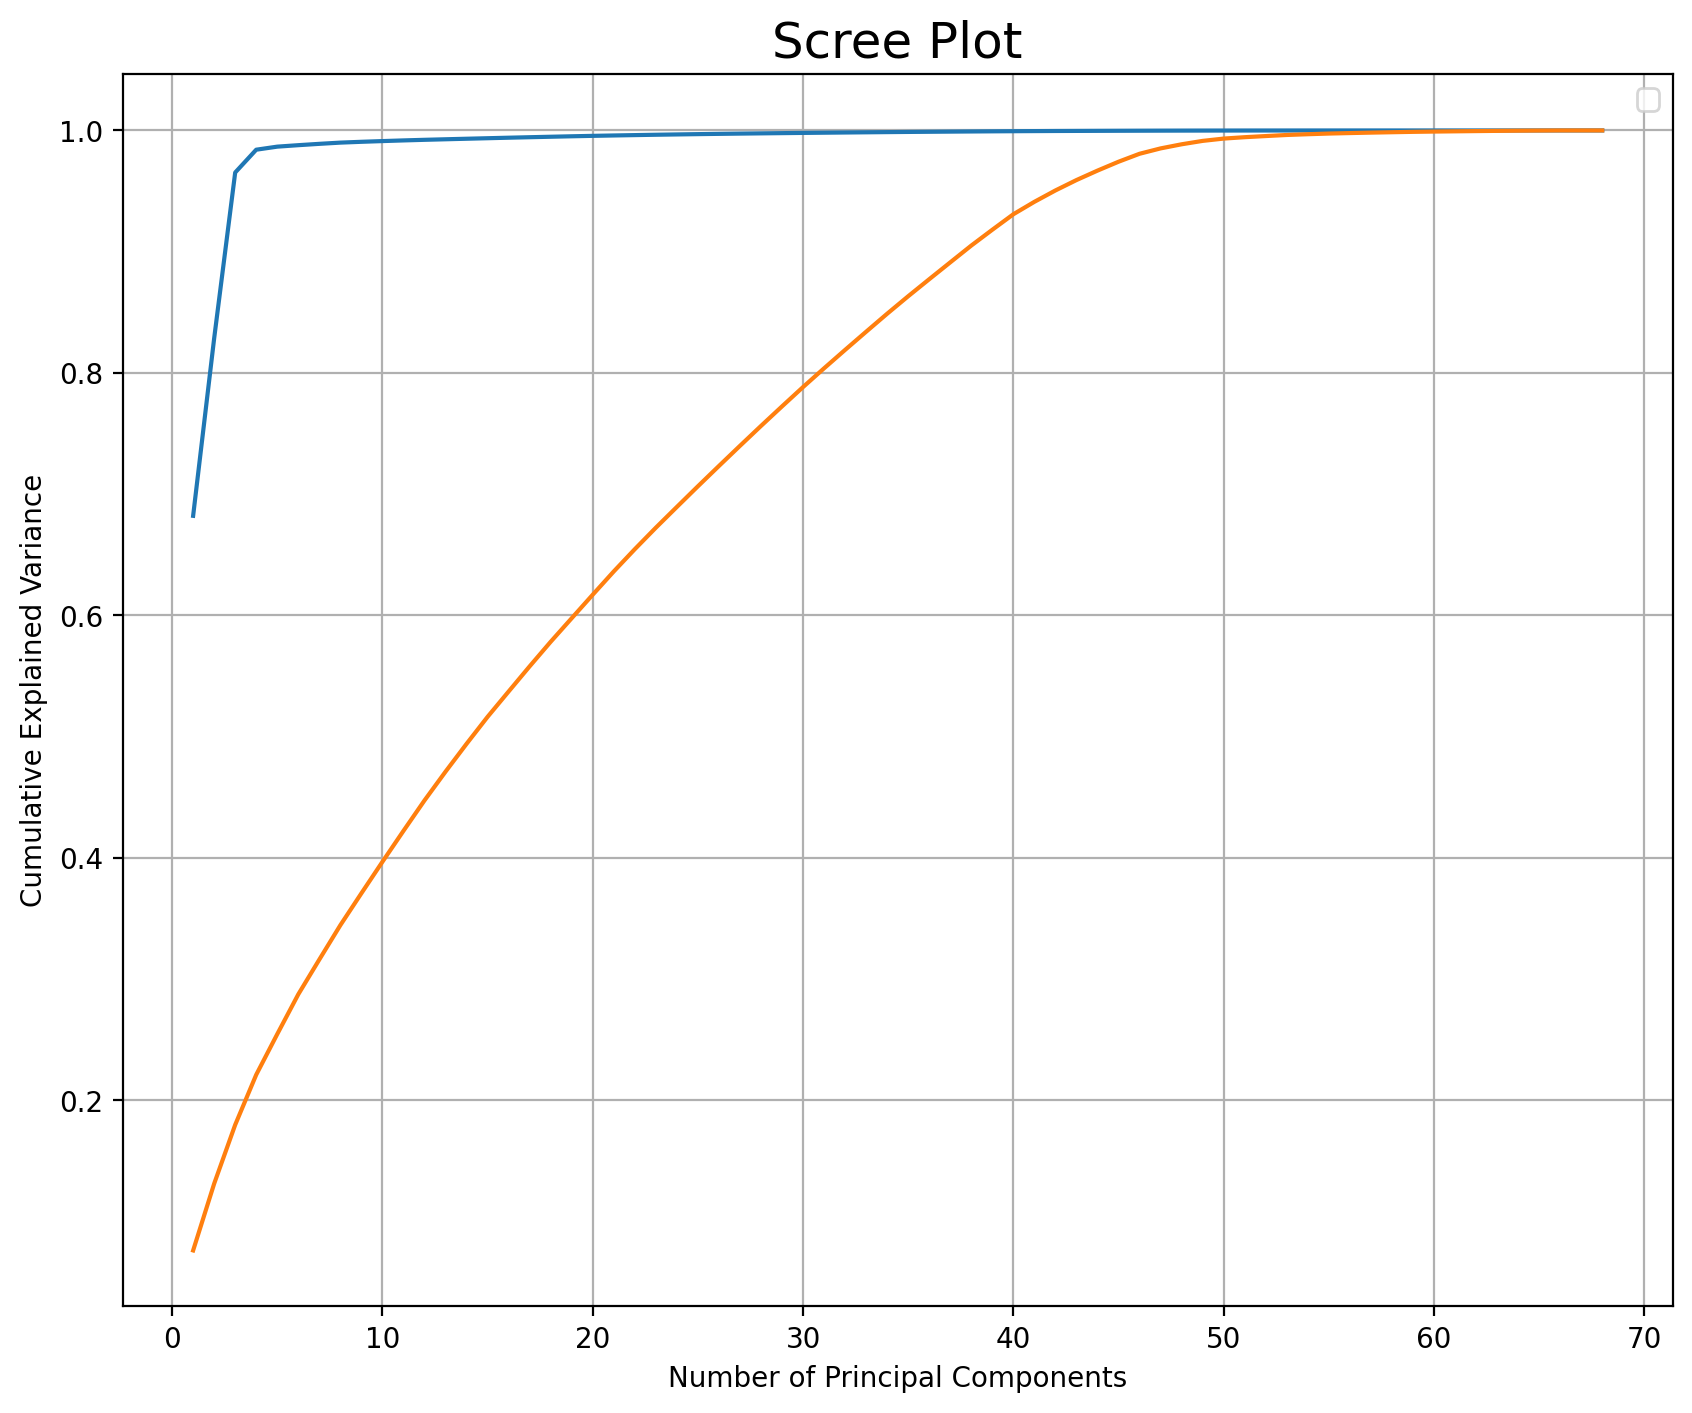

In [39]:
def scree_plot(X, y):
    Xs = [X, StandardScaler().fit_transform(X)]

    for x in Xs:
        pca = PCA(random_state=12)
        pca.fit(x, y)
        explained_variance_ratio = pca.explained_variance_ratio_
        cumulative_variance = np.cumsum(explained_variance_ratio)
        plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance)

    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('Scree Plot')
    plt.legend()
    plt.grid(True)
    plt.show()

scree_plot(X, y)

In [43]:
def model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1212)  

    # Create a model pipeline
    pipe = Pipeline([('scaler', StandardScaler()),('classifier', LogisticRegression())])

    # Define the hyperparameters to be fine-tuned for the model 
    param_grids = {
        "classifier__penalty": ['l2'],
        "classifier__solver": ['lbfgs'],
        "classifier__C": np.logspace(-5, 5, 11), 
        "classifier__fit_intercept": [True, False],
    }

    scoring = {'AUC': make_scorer(roc_auc_score),'Recall': make_scorer(recall_score)}
    mod = GridSearchCV(pipe, param_grids, cv=5, scoring=scoring, refit='AUC')
    mod.fit(X_train, y_train)

    y_preds = mod.predict(X_test)

    # Calculate and print evaluation metrics
    model_auc = roc_auc_score(y_test, y_preds)
    model_recall = recall_score(y_test, y_preds)
    model_accuracy = accuracy_score(y_test, y_preds)
    print(f"- Best params used to build the model: {mod.best_params_}.")
    print(f"- Model AUC is {model_auc:.2f}")
    print(f"- Model Recall is {model_recall:.2f}")
    print(f"- Model Accuracy is {model_accuracy:.2f}")
    

    # Plot the confusion matrix
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.set_title(f"Confusion Matrix")
    plot_confusion_matrix(mod, X_test, y_test, cmap='YlOrBr', normalize='true', ax=ax)
    plt.show()

#model(X, y)

ValueError: 
All the 110 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
110 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\fawzy\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\fawzy\anaconda3\lib\site-packages\sklearn\pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\fawzy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1138, in fit
    X, y = self._validate_data(
  File "C:\Users\fawzy\anaconda3\lib\site-packages\sklearn\base.py", line 596, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\fawzy\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 1074, in check_X_y
    X = check_array(
  File "C:\Users\fawzy\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 899, in check_array
    _assert_all_finite(
  File "C:\Users\fawzy\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 146, in _assert_all_finite
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


For sample size: 1000.
- Best params used to build the model: {'classifier__C': 0.001, 'classifier__fit_intercept': False, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}.
- Model AUC is 0.80
- Model Recall is 0.79
- Model Accuracy is 0.80


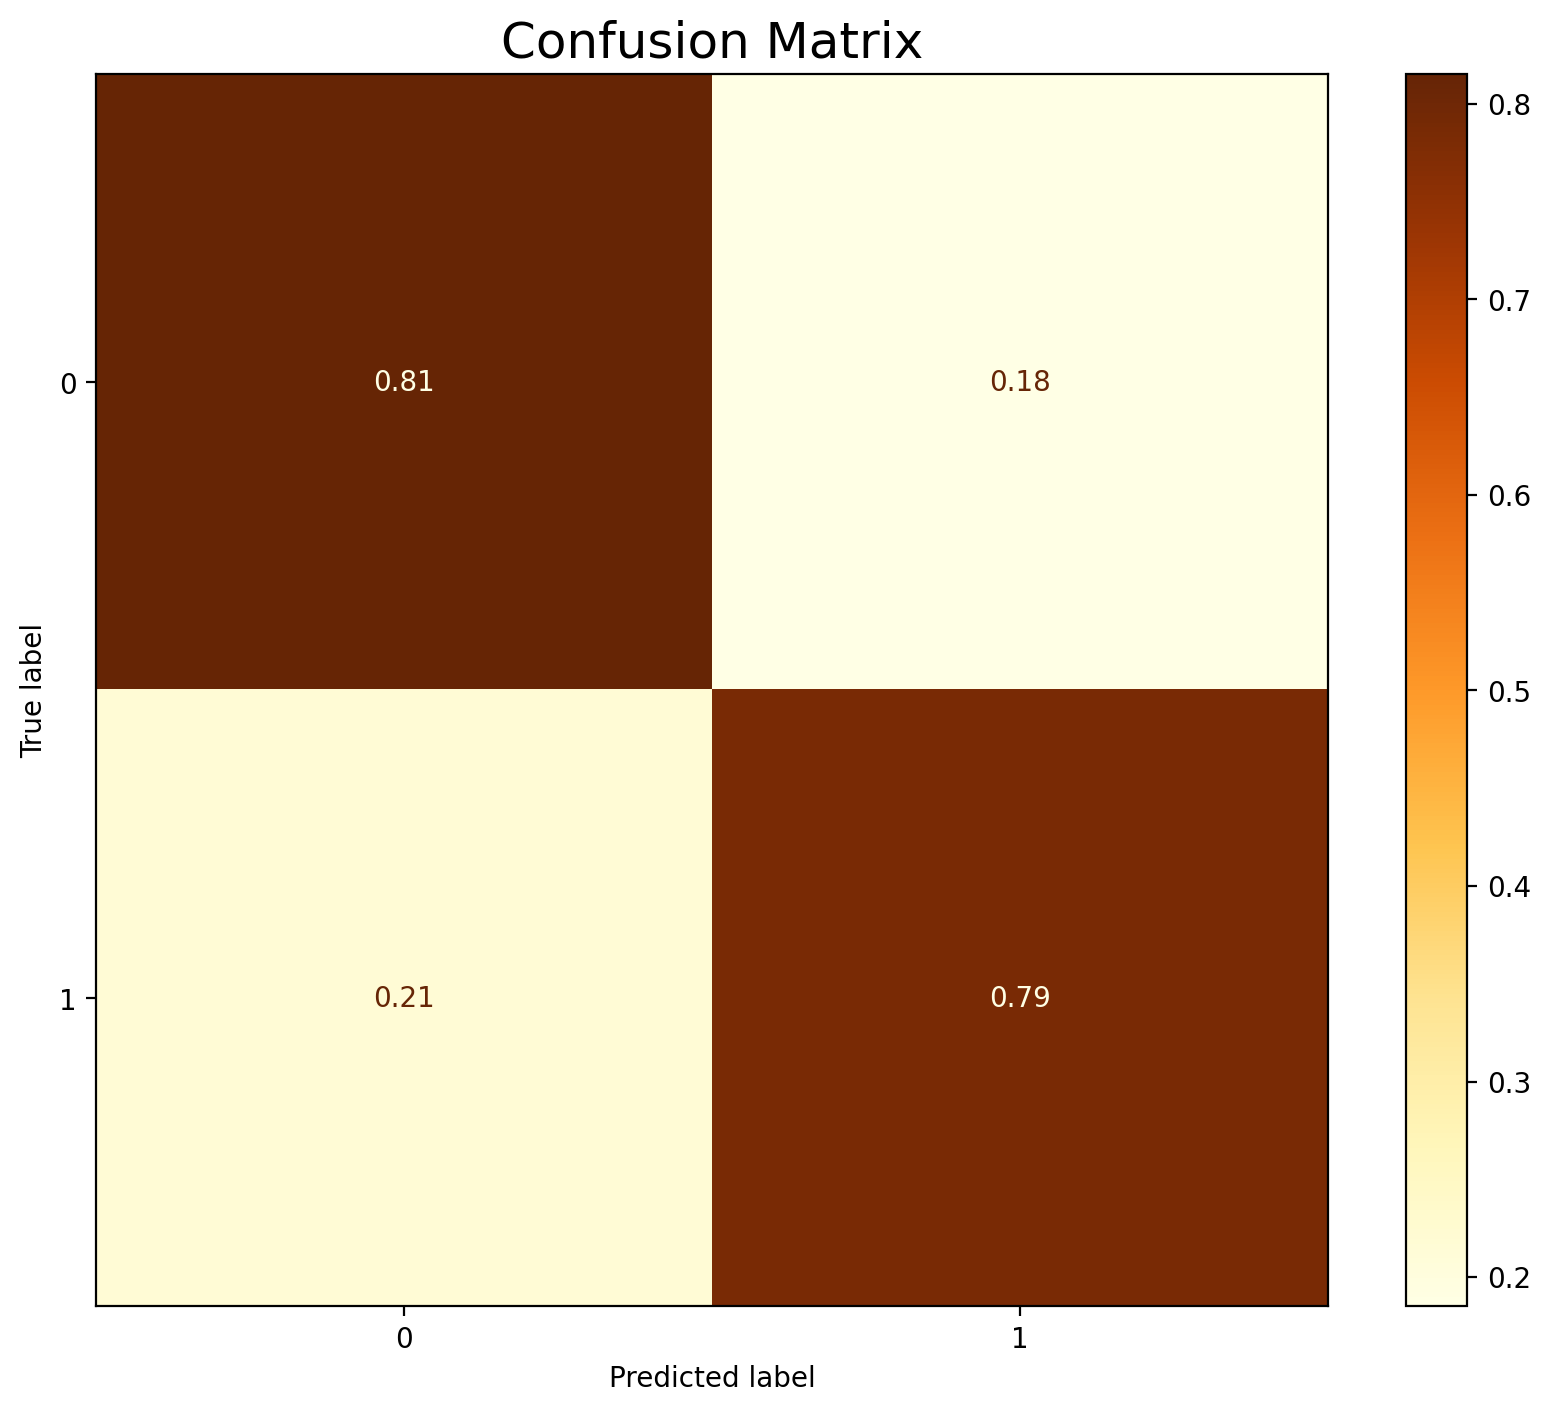

For sample size: 3000.
- Best params used to build the model: {'classifier__C': 0.01, 'classifier__fit_intercept': True, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}.
- Model AUC is 0.78
- Model Recall is 0.74
- Model Accuracy is 0.78


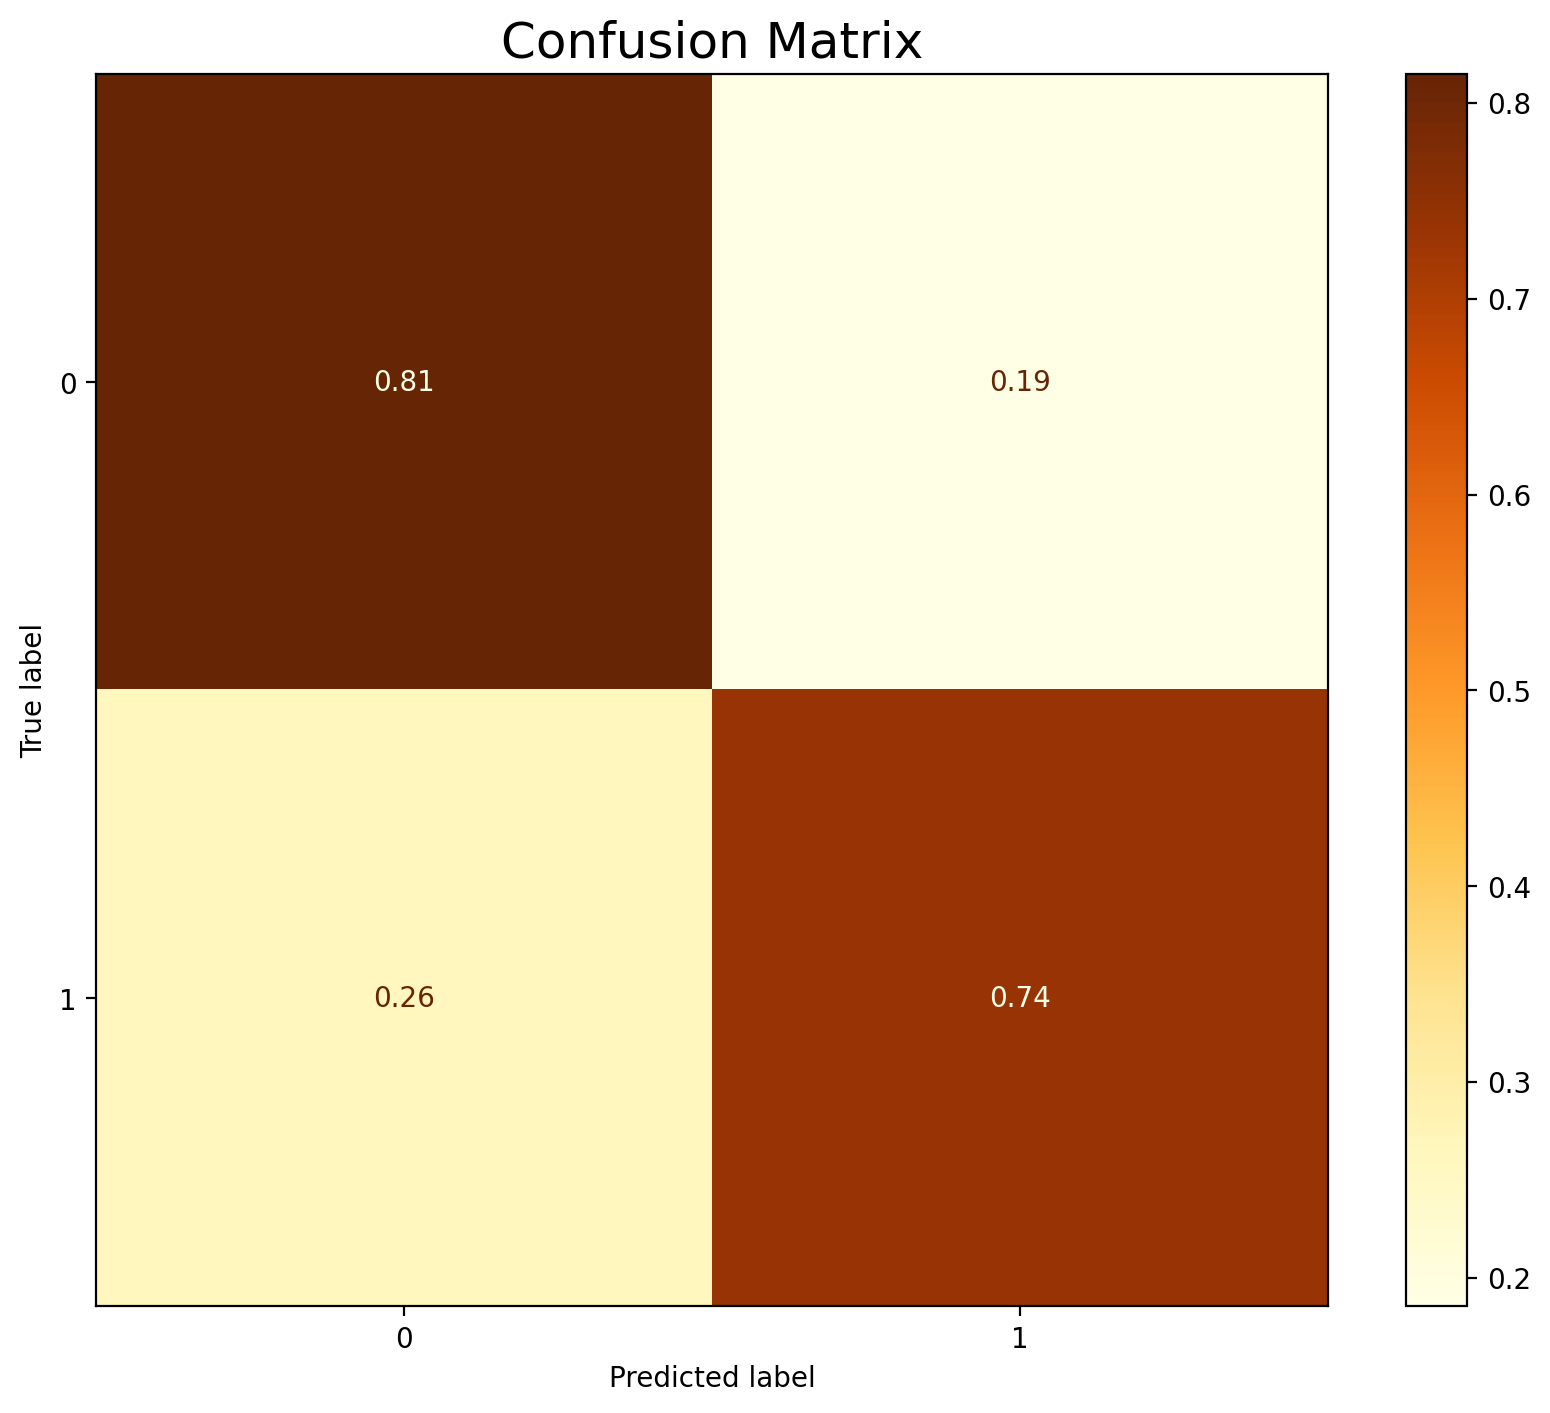

For sample size: 5000.
- Best params used to build the model: {'classifier__C': 0.01, 'classifier__fit_intercept': True, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}.
- Model AUC is 0.78
- Model Recall is 0.74
- Model Accuracy is 0.78


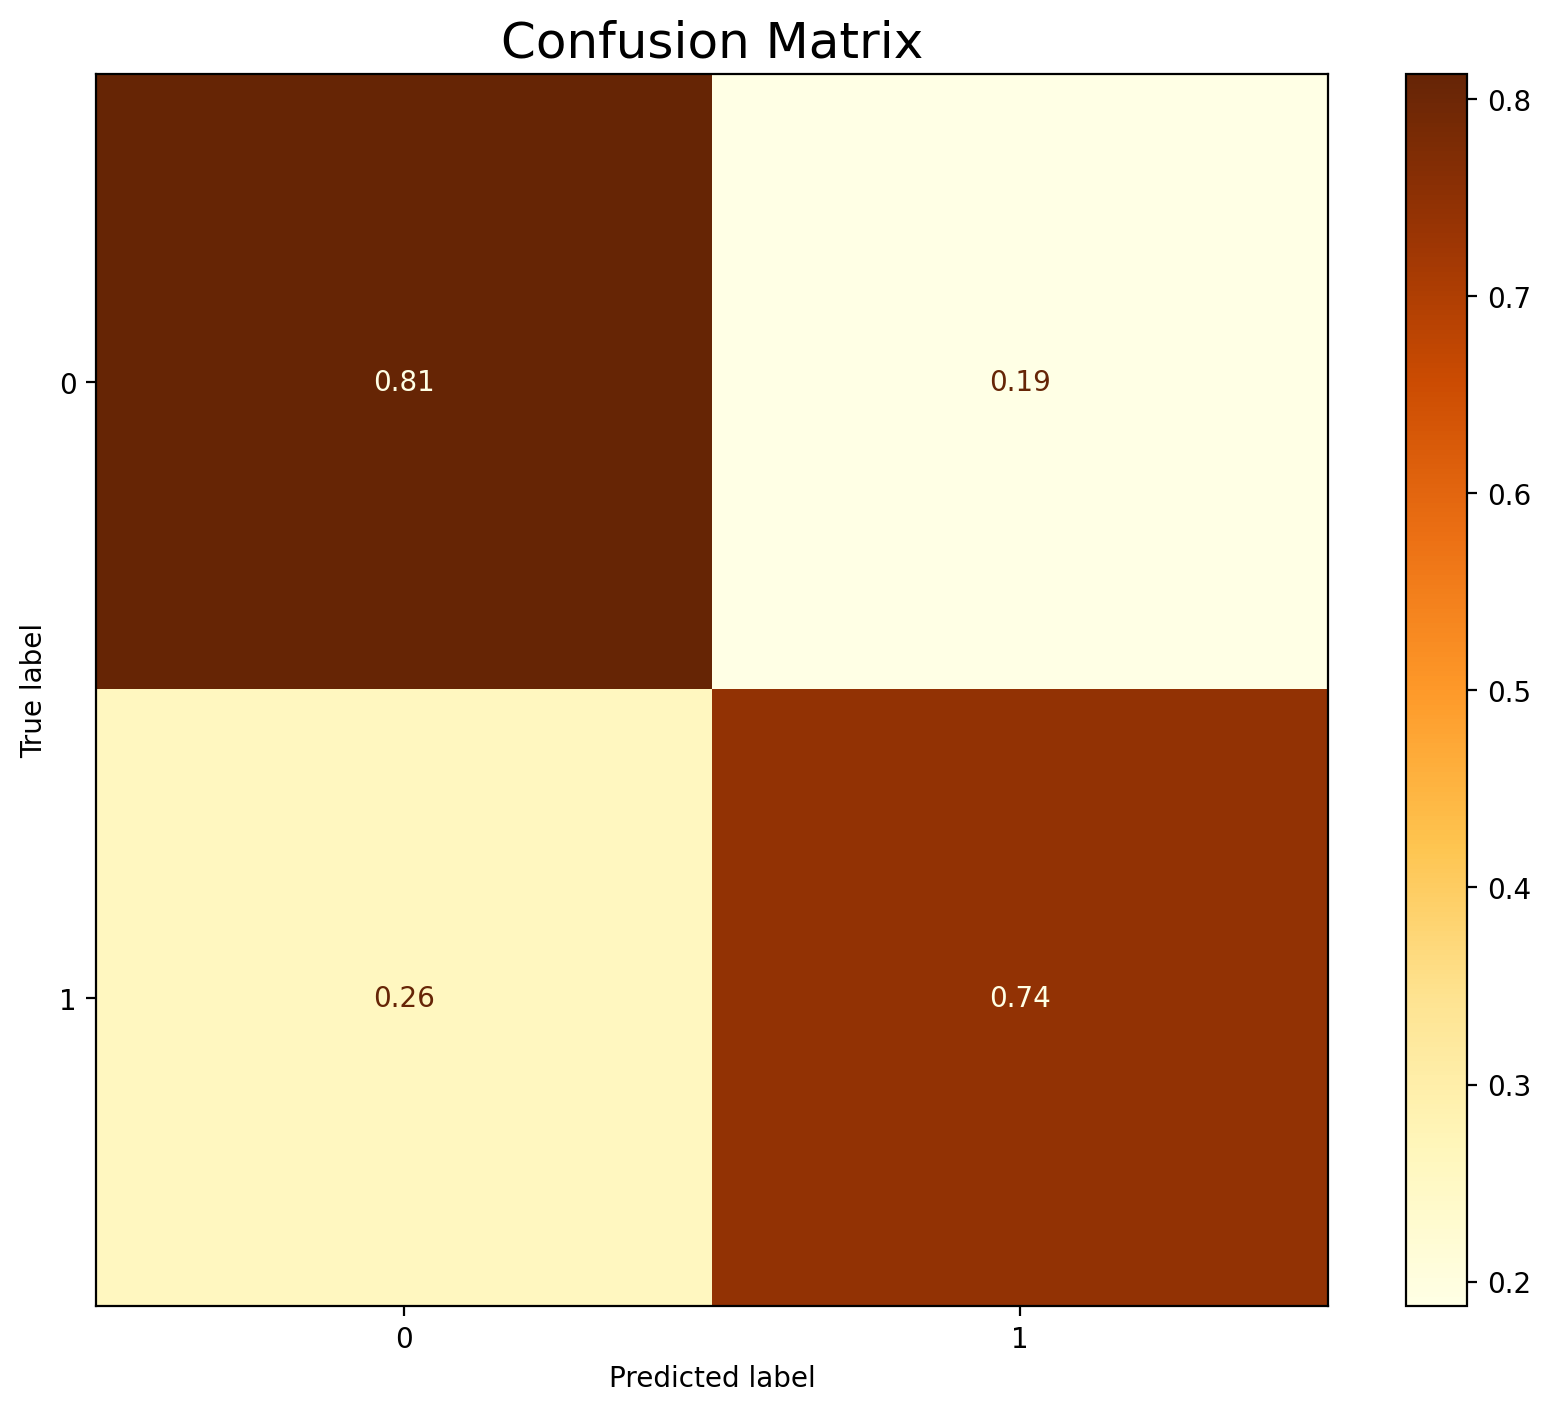

For sample size: 10000.
- Best params used to build the model: {'classifier__C': 0.001, 'classifier__fit_intercept': True, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}.
- Model AUC is 0.78
- Model Recall is 0.75
- Model Accuracy is 0.78


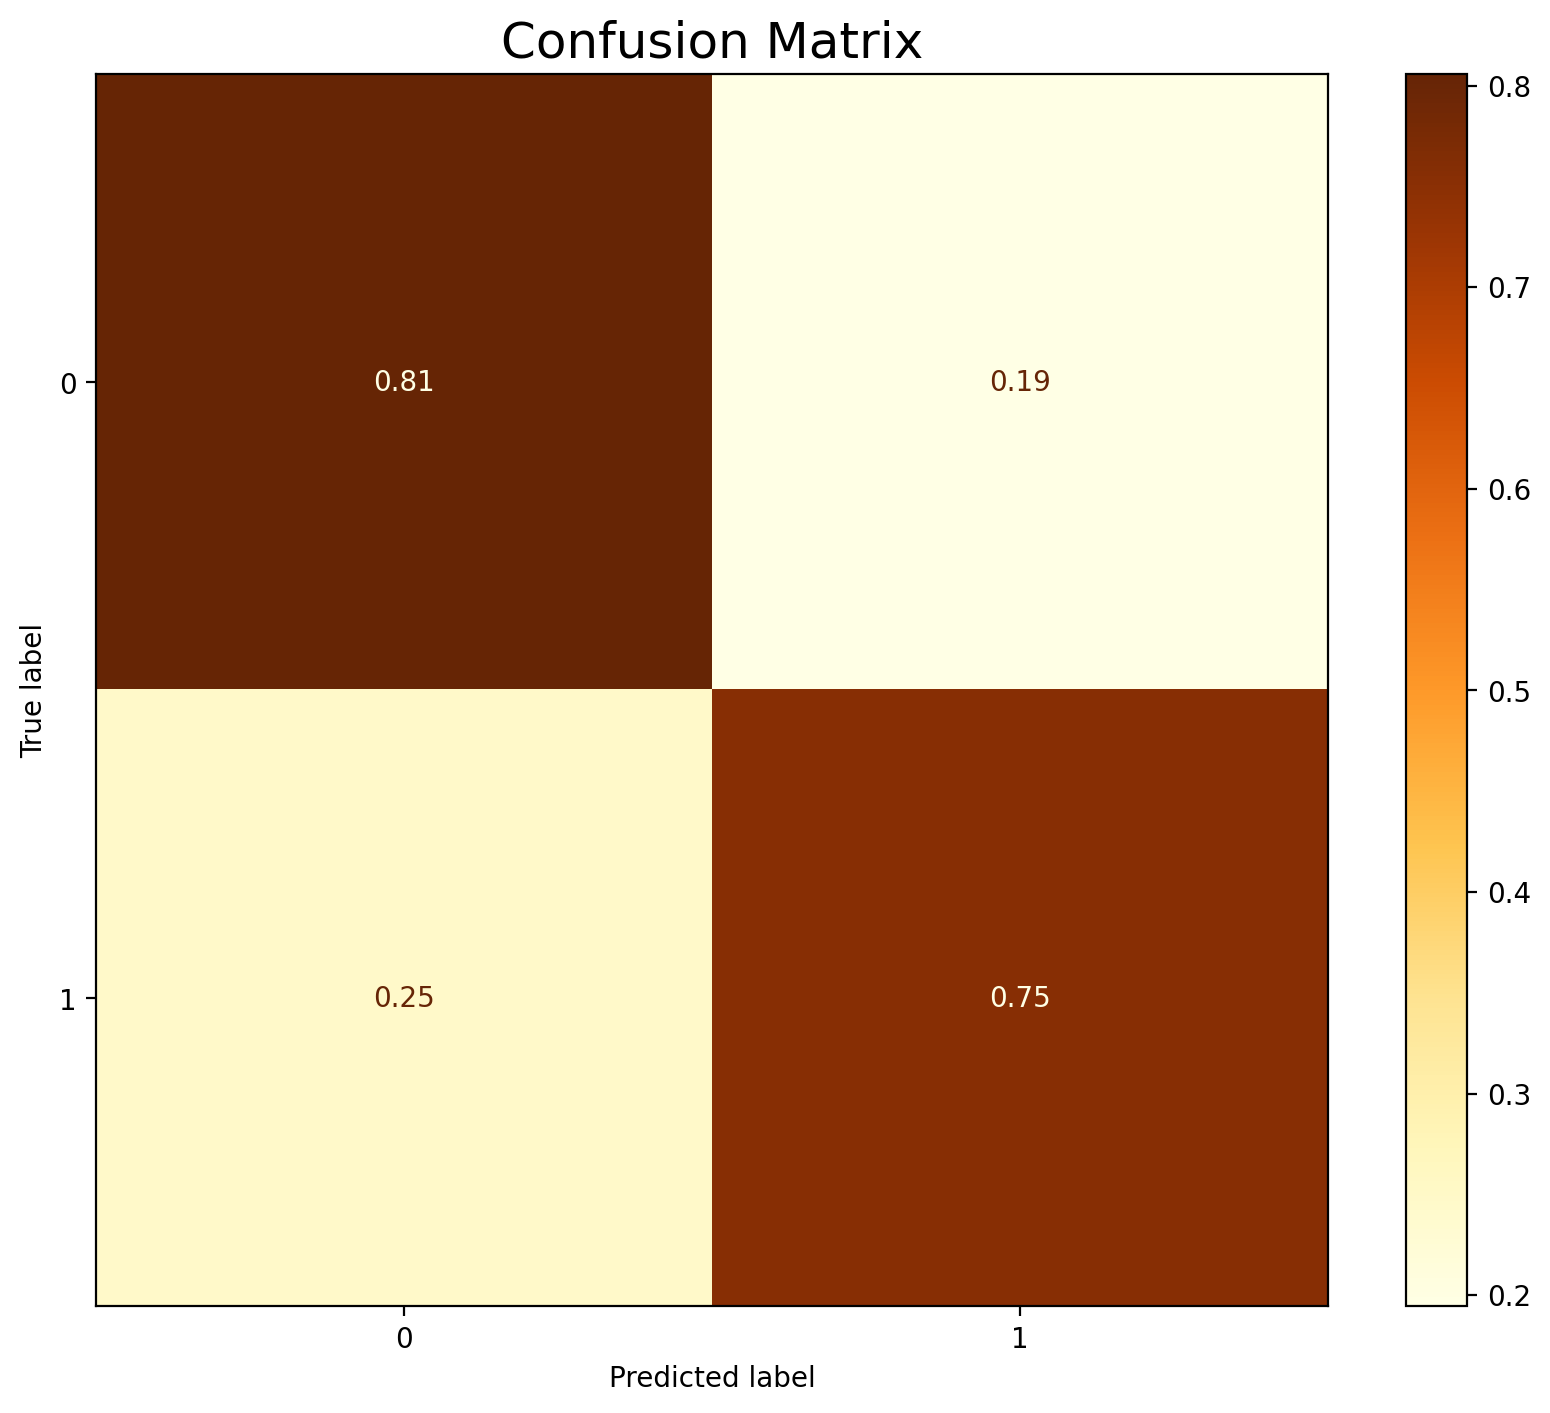

For sample size: 15000.
- Best params used to build the model: {'classifier__C': 0.001, 'classifier__fit_intercept': True, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}.
- Model AUC is 0.79
- Model Recall is 0.76
- Model Accuracy is 0.79


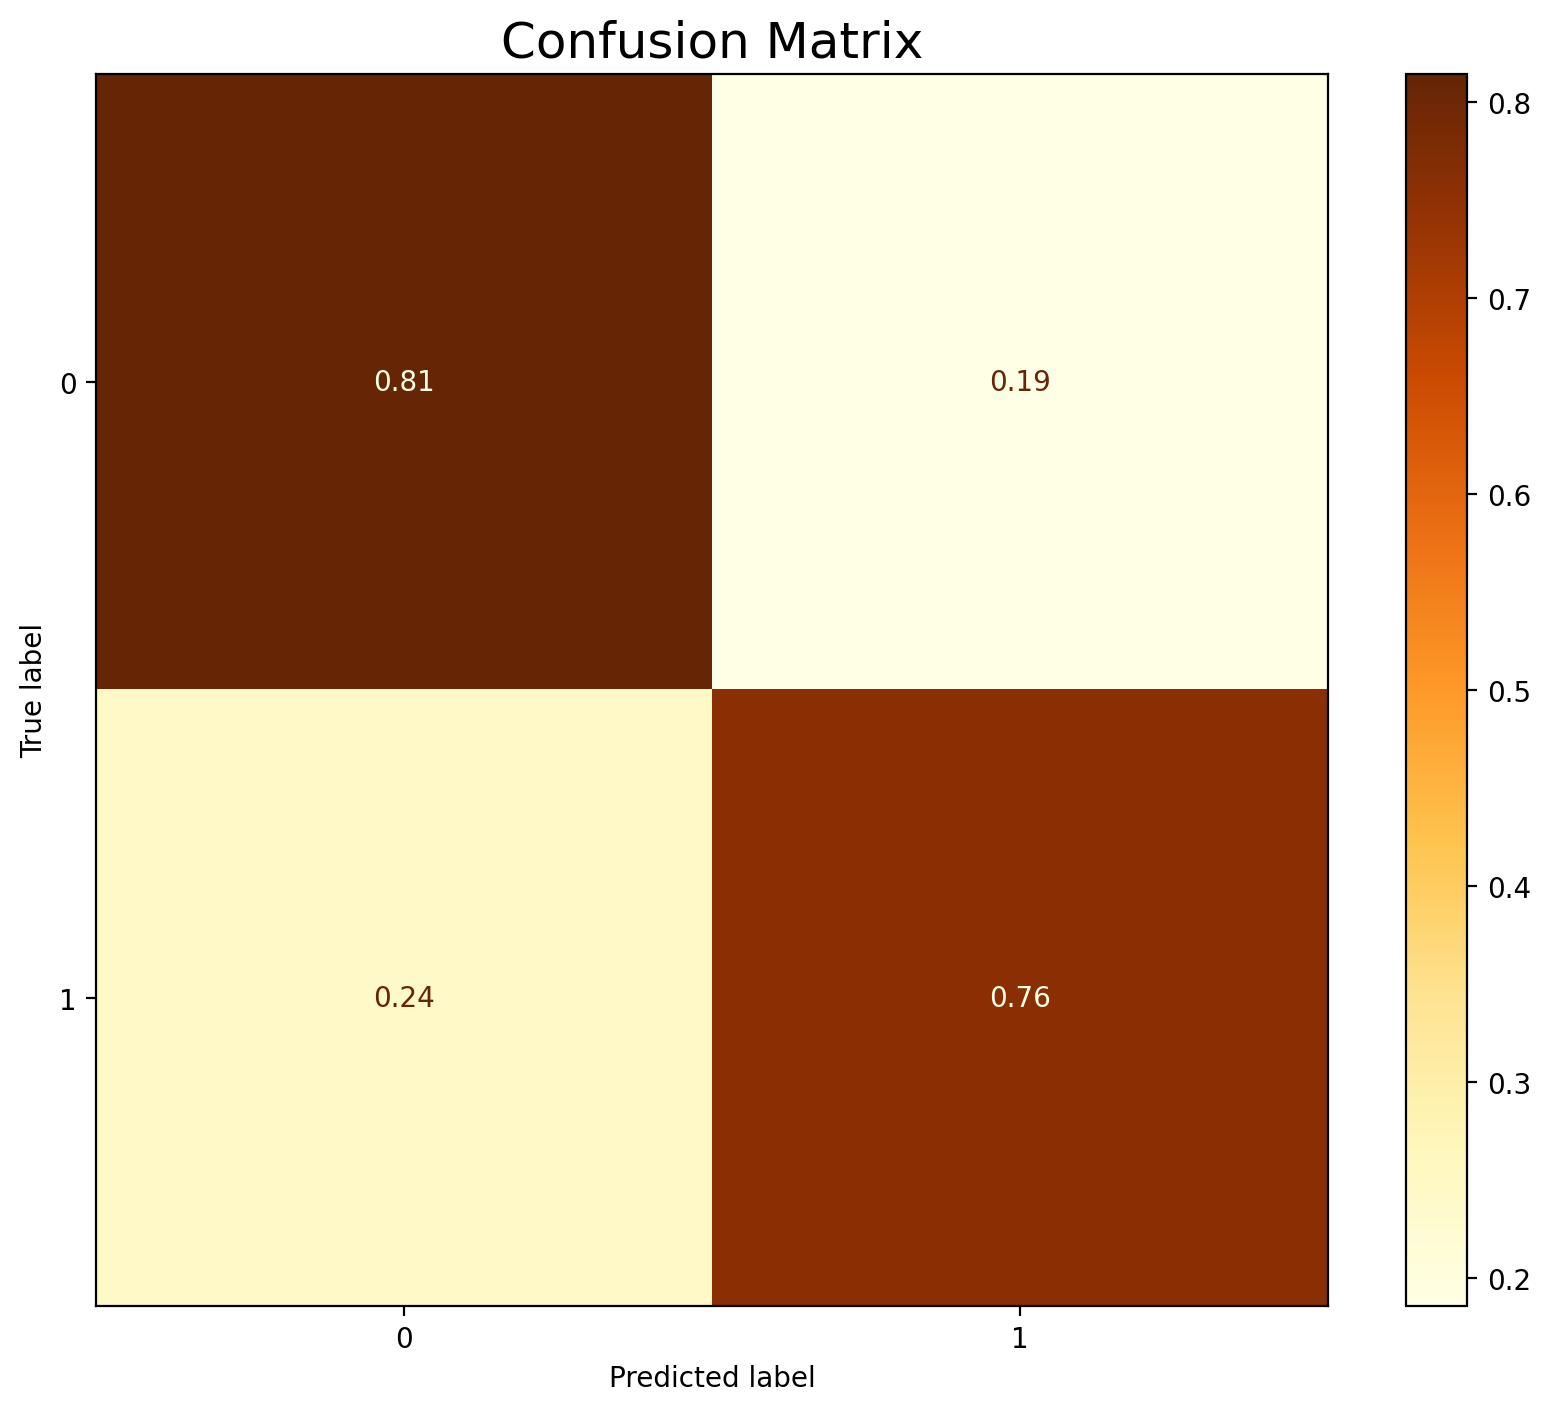

For sample size: 20000.
- Best params used to build the model: {'classifier__C': 0.001, 'classifier__fit_intercept': True, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}.
- Model AUC is 0.79
- Model Recall is 0.76
- Model Accuracy is 0.79


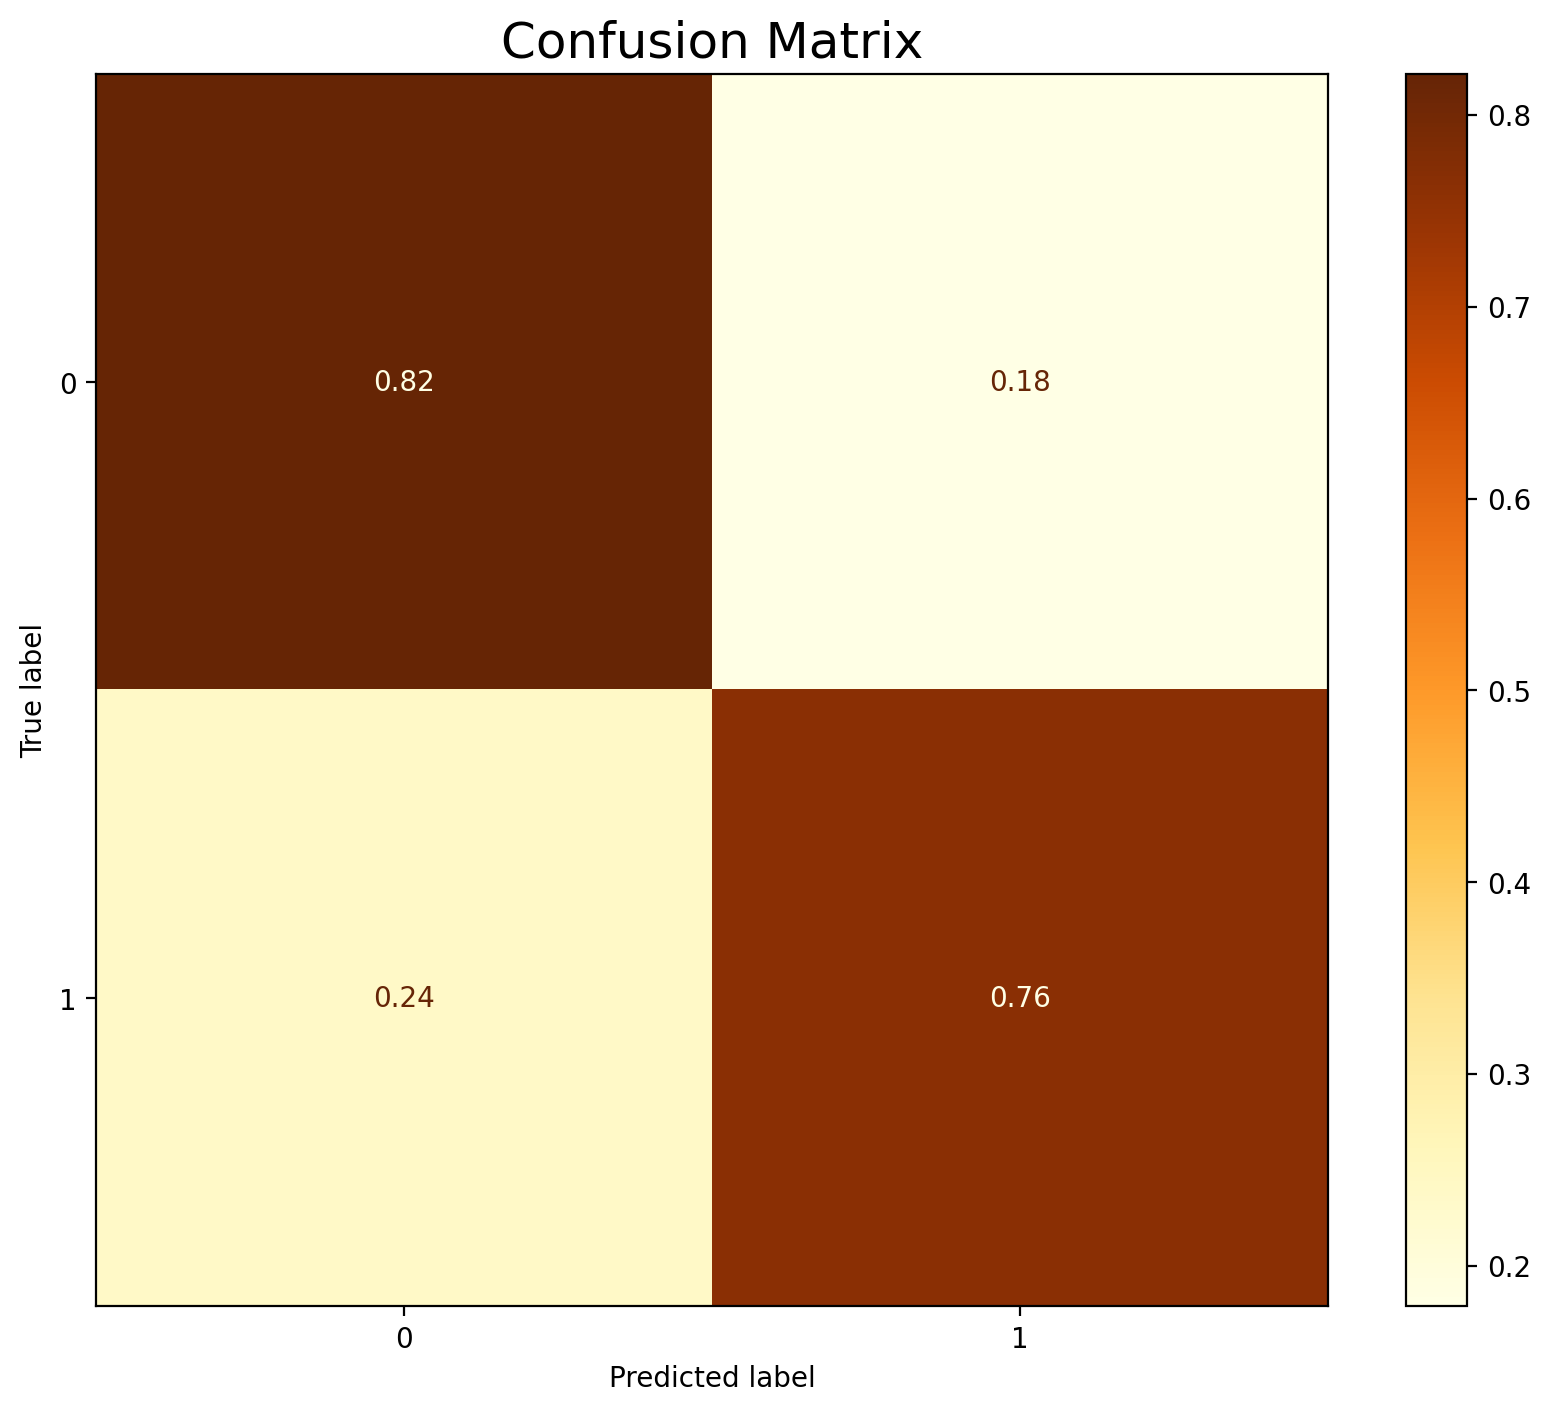

For sample size: 30000.
- Best params used to build the model: {'classifier__C': 0.01, 'classifier__fit_intercept': True, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}.
- Model AUC is 0.78
- Model Recall is 0.75
- Model Accuracy is 0.78


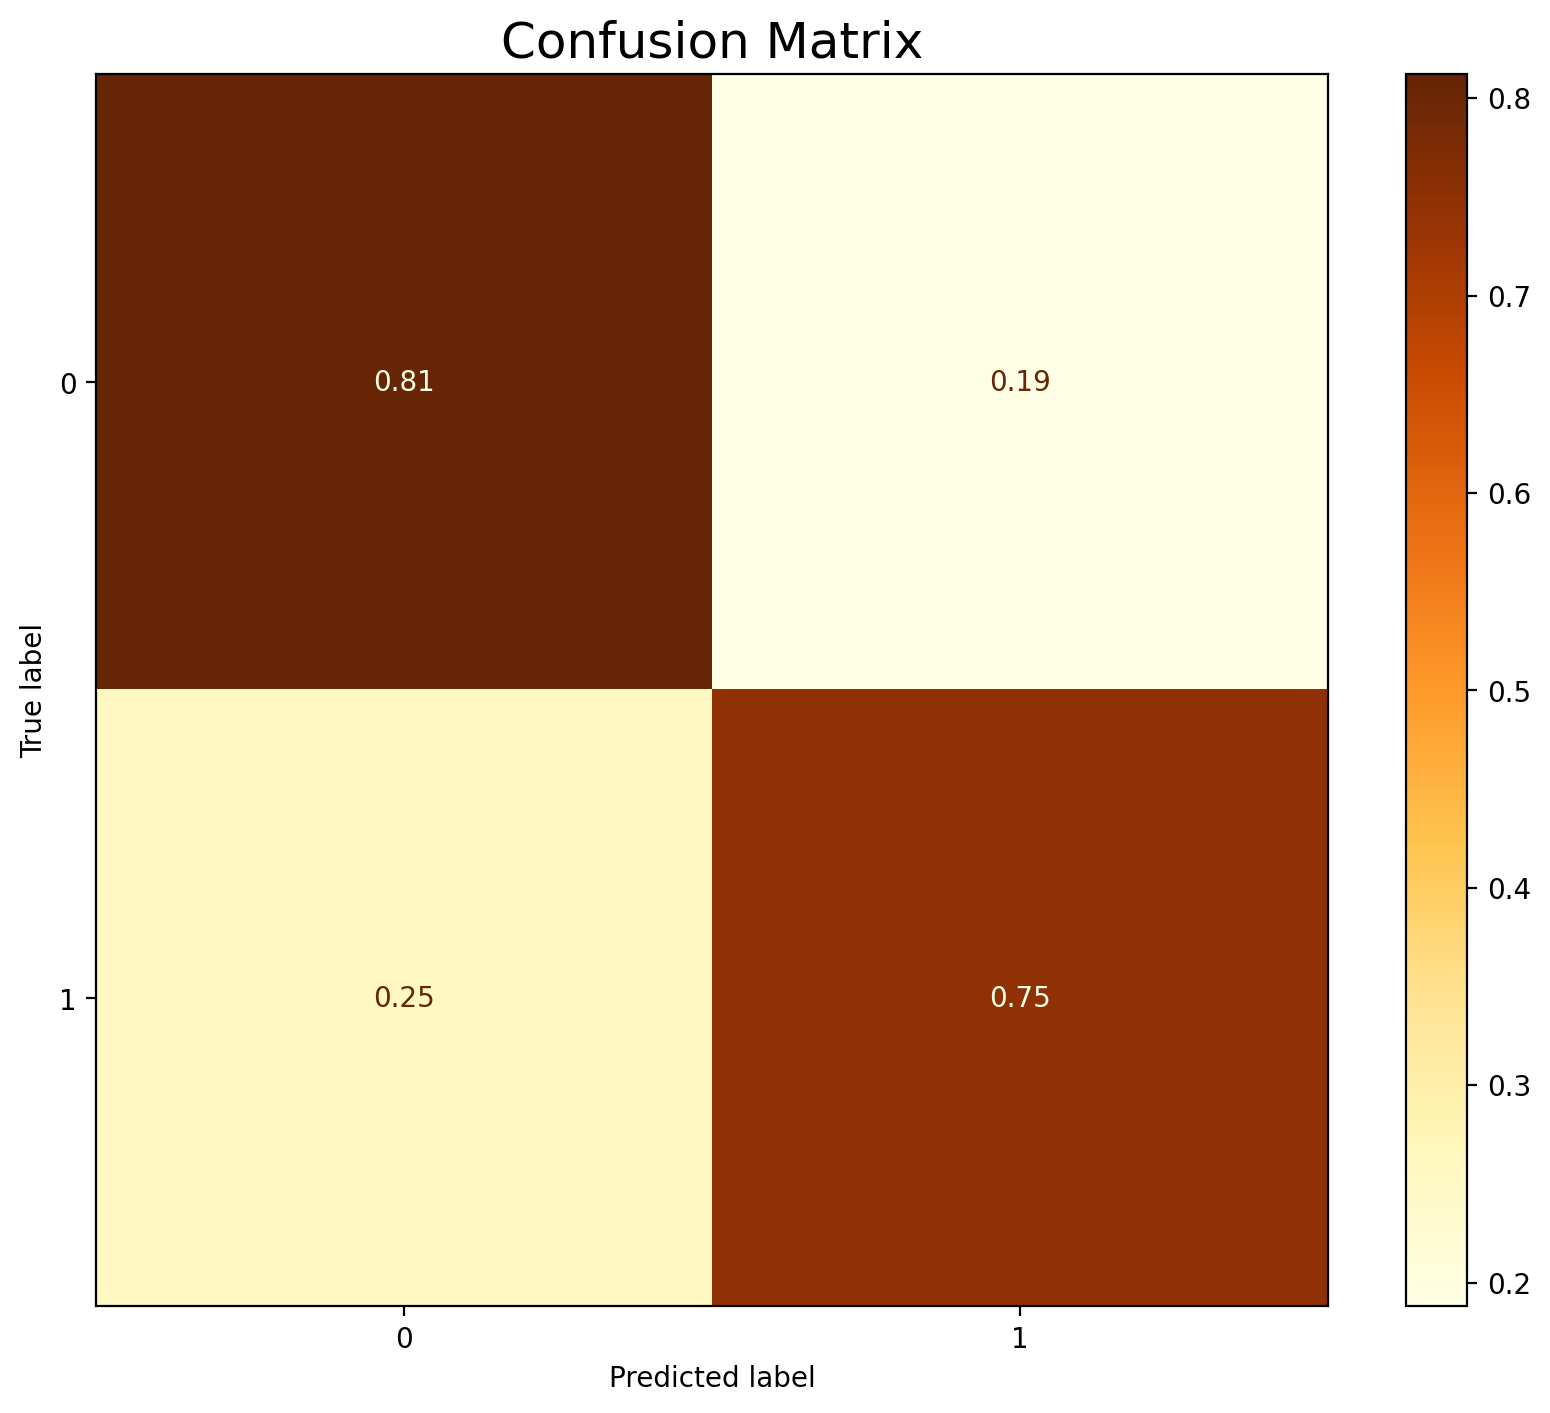

For sample size: 45000.
- Best params used to build the model: {'classifier__C': 0.0001, 'classifier__fit_intercept': True, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}.
- Model AUC is 0.78
- Model Recall is 0.76
- Model Accuracy is 0.78


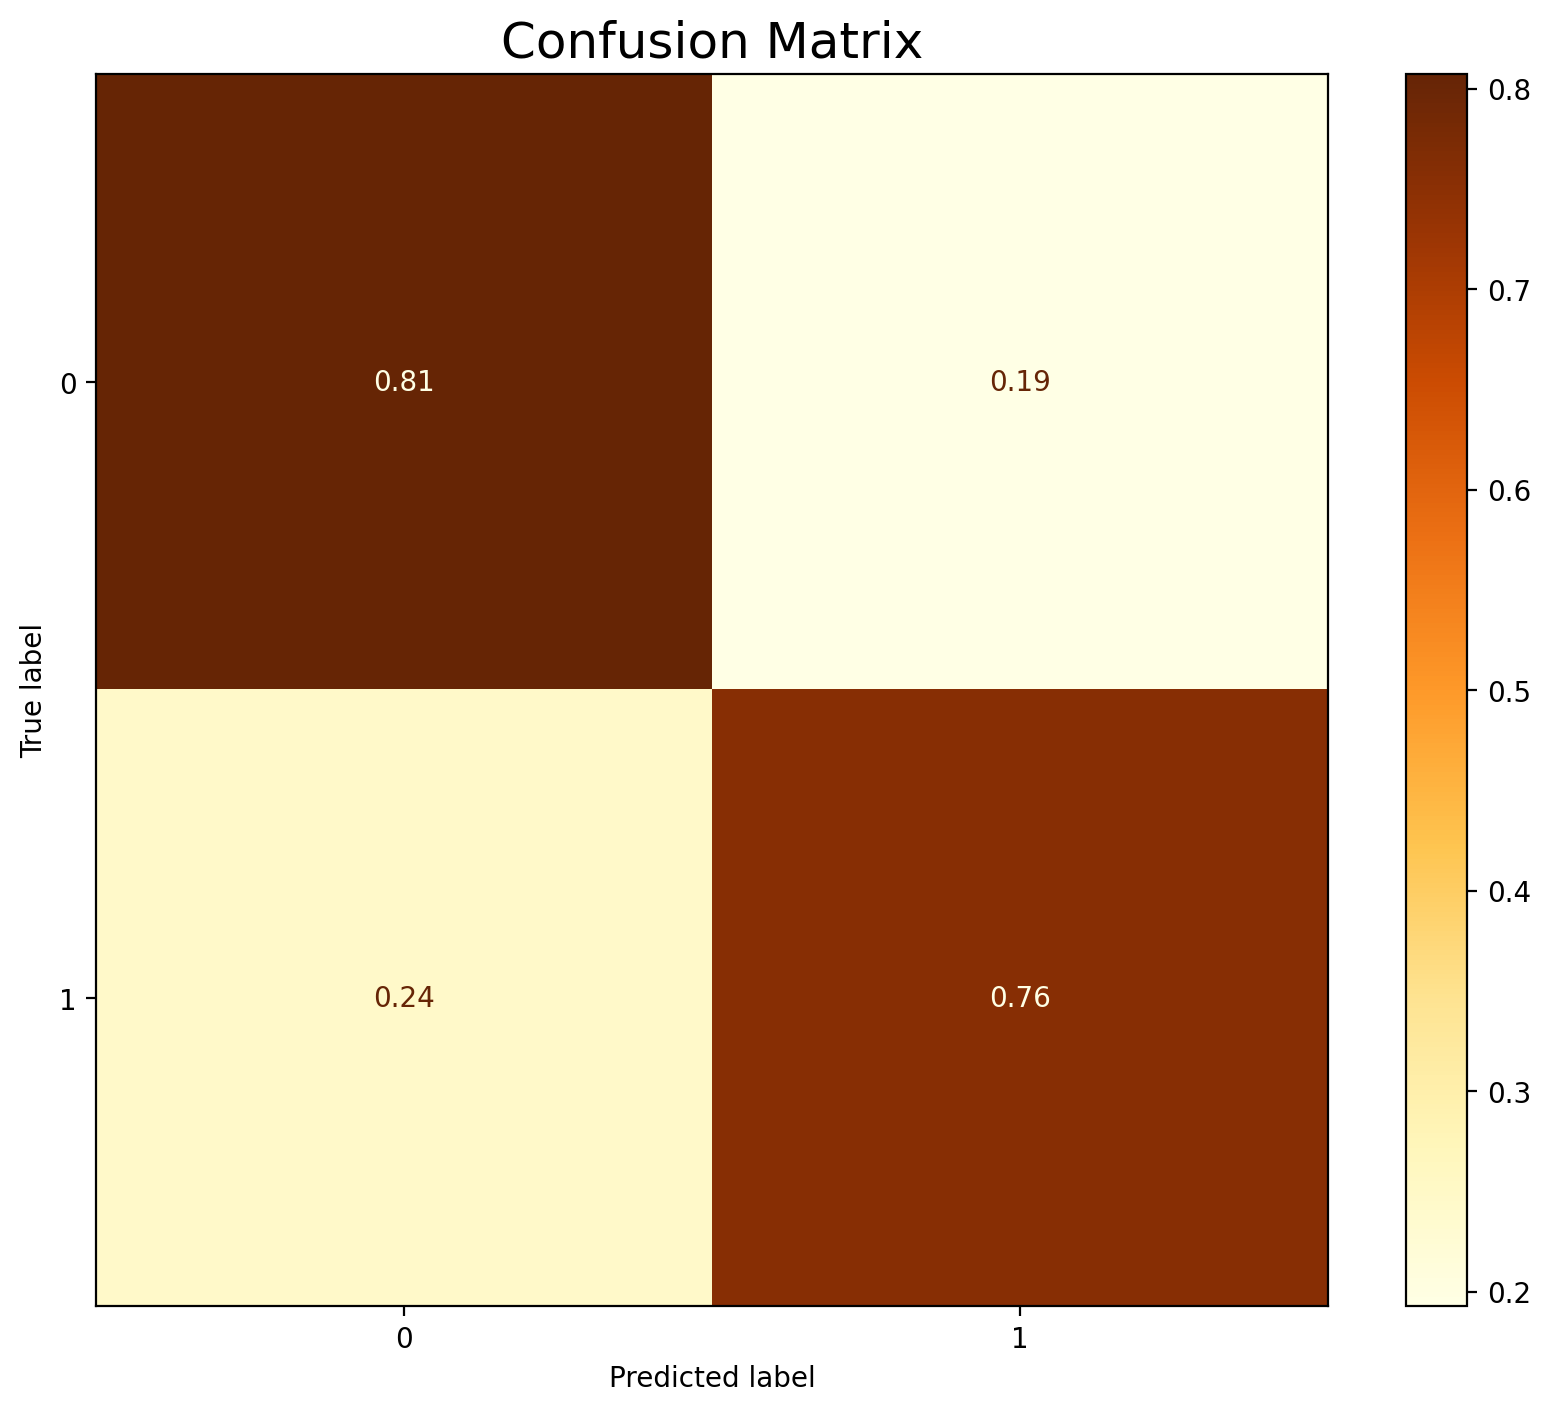

For sample size: 57243.
- Best params used to build the model: {'classifier__C': 0.0001, 'classifier__fit_intercept': True, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}.
- Model AUC is 0.78
- Model Recall is 0.74
- Model Accuracy is 0.78


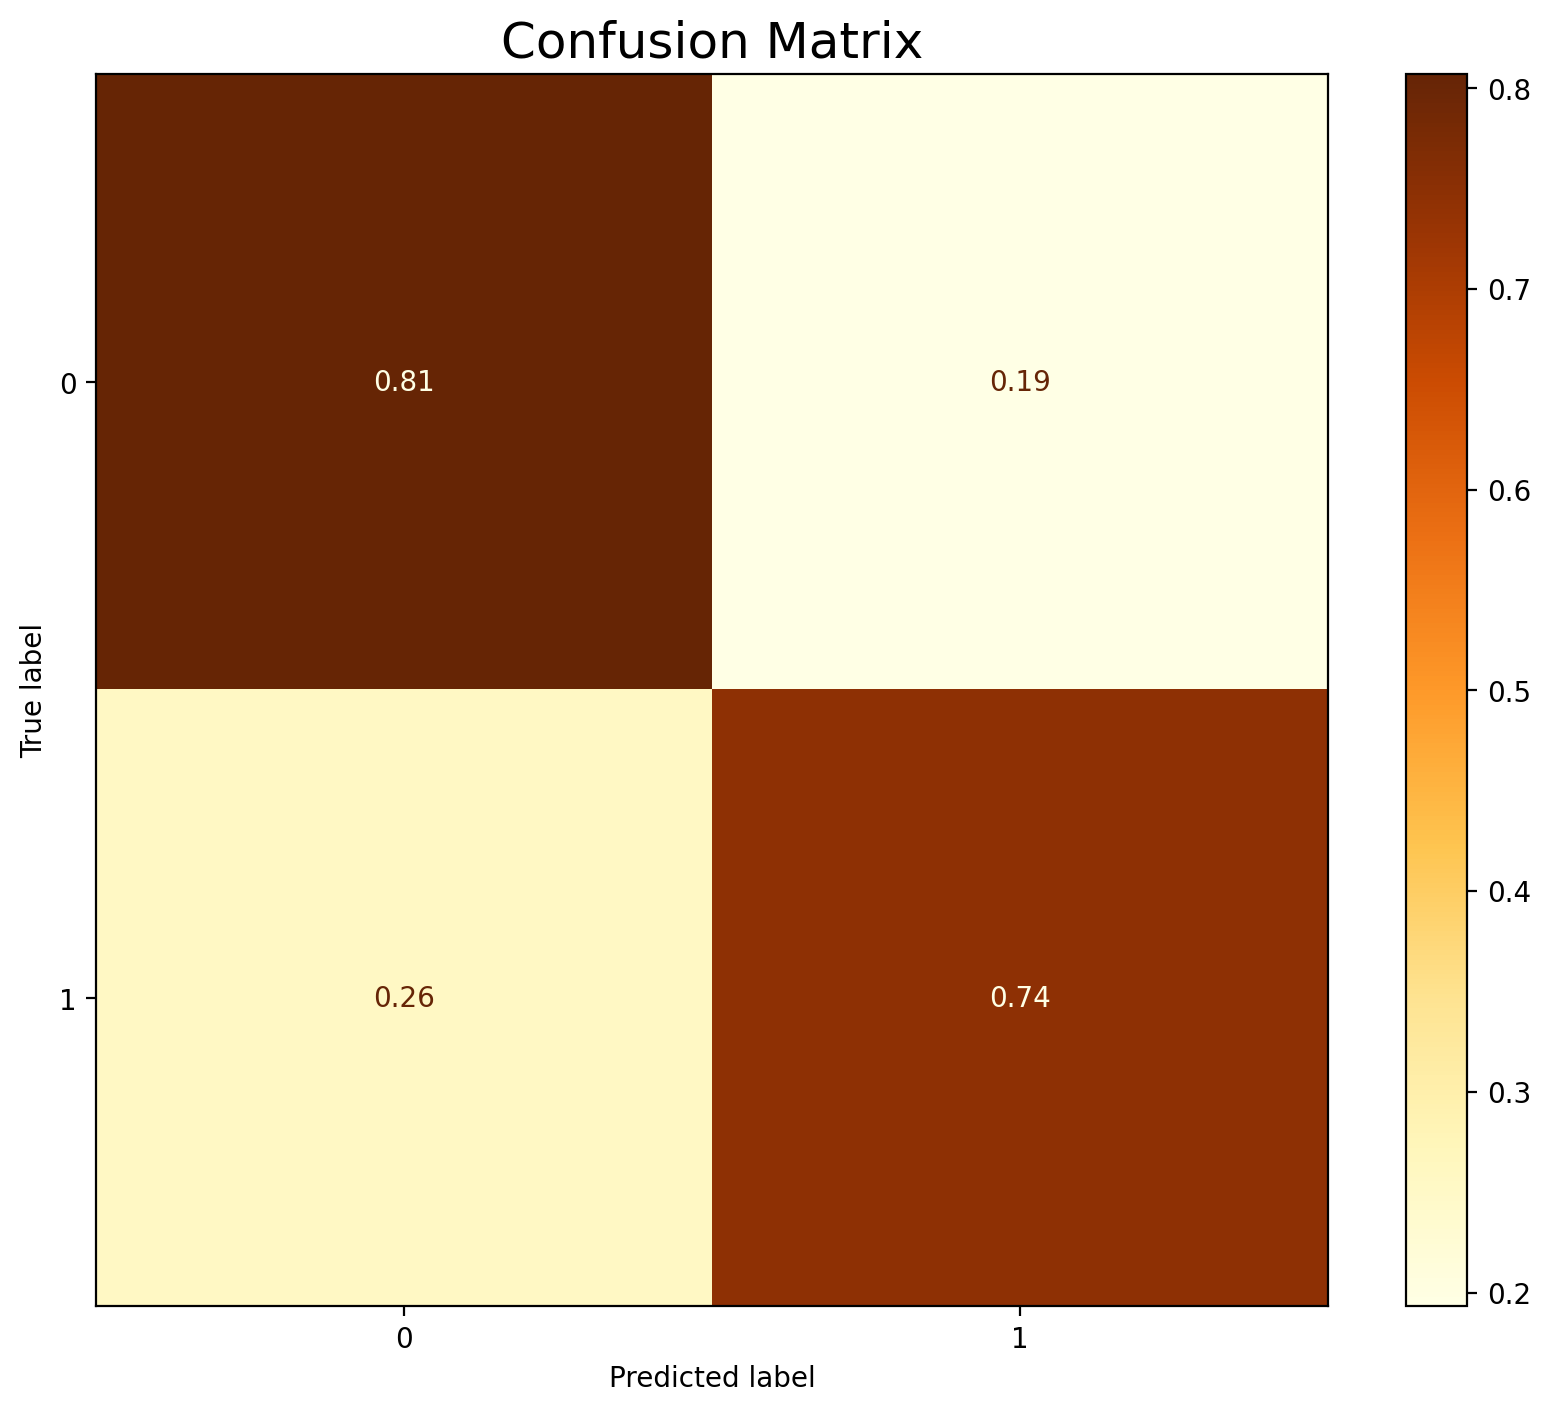

In [44]:
samples = [1000, 3000, 5000, 10000, 15000, 20000, 30000, 45000, len(df.loc[df['DM'] == 'Yes'])]

for i in samples:
    sample_size = i
    print(f'For sample size: {i}.')
    df_yes = df.loc[df['DM'] == 'Yes'].sample(sample_size, replace=False, random_state=1212)
    df_no = df.loc[df['DM'] == 'No'].sample(sample_size, replace=False, random_state=1212)
    df_mod = pd.concat([df_yes, df_no]).sample(frac=1).reset_index(drop=True)

    X = pd.get_dummies(df_mod.drop('DM', axis=1))
    y = df_mod['DM'].replace({'Yes':1, 'No':0})

    nullcols = [col for col in X.columns if X[col].isnull().any() == True]

    imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
    X[nullcols] = imputer.fit_transform(X[nullcols])
    
    model(X, y)

# <font color='red'>Thank You!</font>